In [1]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/cleaned_sa_2021_2022.xlsx")

In [4]:
df.shape

(31060, 133)

In [5]:
df.head(12)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SAFETIME,CADULT1,CELLSEX,PVTRESD3,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW1,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,HIVTST7,PDIABTST,PREDIAB1,CAREGIV1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_DUALCOR,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,MARIJ_ABUSER,ECIG_ABUSER,TOBA_ABUSER,ALCO_ABUSER,LEVEL_ABUSER,TARGET_ABUSER
0,32,1,2082021,2,8,2021,NaN,NaN,NaN,NaN,NaN,NaN,2,5,30,30,30.000,3,2,1,1,2,1,2,1,1,2,1,1,1,1,3,1,2,6,1,1,2,8,88,3,140,509,2,2,1,1,1,1,1,3.000,3,4,888,NaN,NaN,NaN,2,NaN,2,1,NaN,NaN,1.000,NaN,1,2,2,2,1,2,2,1,1,1,1,4,4,88,1,1,1,1,0.491,2,3,3,1,1,2,1.000,2,2,1,1.000,1,1,2,1,1,1,1,2,9,1,61,5,69.000,175.000,6350.000,2067.000,2.000,1,1,4,2,3,1,1,2,0,1,0,1,NaN,NaN,1,0,0,0,0,0,0
1,32,1,2032021,2,3,2021,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,88,88.000,3,1,2,1,1,2,2,2,2,2,2,2,2,2,3,1,2,6,1,2,2,7,88,6,190,510,2,2,2,2,2,2,1,1.000,3,4,201,1.000,88.000,1.000,1,112020.000,2,1,NaN,NaN,2.000,1.000,2,1,2,2,2,3,3,3,1,1,1,4,5,88,1,1,6,1,0.491,1,2,1,1,9,1,2.000,1,1,3,1.000,5,5,2,5,2,3,5,1,11,2,71,6,70.000,178.000,8618.000,2726.000,3.000,2,1,4,4,1,2,1,1,3,1,23,1,1.000,2.000,1,0,0,0,0,0,0
2,32,1,2062021,2,6,2021,NaN,NaN,NaN,NaN,NaN,NaN,2,2,88,2,88.000,3,1,2,1,1,2,2,2,2,2,1,2,1,2,3,1,1,6,1,1,2,7,88,8,134,410,2,2,2,2,2,2,2,NaN,3,3,201,1.000,88.000,1.000,1,122020.000,1,2,NaN,NaN,1.000,NaN,2,2,2,2,2,1,1,1,1,1,1,5,5,88,1,1,1,1,0.491,1,1,2,1,9,1,2.000,1,1,3,1.000,1,1,2,1,1,1,1,2,11,2,74,6,58.000,147.000,6078.000,2801.000,3.000,2,1,4,5,4,1,1,1,3,1,23,1,1.000,1.000,2,0,0,0,0,0,0
3,32,1,3112021,3,11,2021,NaN,NaN,NaN,NaN,NaN,NaN,1,3,5,10,10.000,3,1,2,1,1,2,2,2,2,2,2,2,2,2,4,1,1,4,1,1,2,7,88,6,280,600,2,2,2,1,2,2,1,3.000,3,4,888,NaN,NaN,NaN,1,102020.000,1,1,NaN,NaN,2.000,2.000,2,2,2,2,2,1,1,1,1,1,1,5,5,88,1,1,1,1,0.491,1,2,2,1,9,1,2.000,1,1,3,1.000,1,1,2,1,1,1,1,1,10,2,65,6,72.000,183.000,12701.000,3797.000,4.000,2,1,2,4,3,1,1,2,0,1,0,1,1.000,1.000,1,0,0,0,0,0,0
4,32,1,2142021,2,14,2021,NaN,NaN,NaN,NaN,NaN,NaN,2,5,30,20,30.000,3,2,2,1,2,2,2,2,1,2,1,1,1,2,1,1,1,5,1,1,2,8,88,5,240,507,2,2,2,1,2,2,1,1.000,3,3,888,NaN,NaN,NaN,1,102020.000,2,2,NaN,NaN,1.000,NaN,1,1,2,2,1,1,1,1,1,1,1,3,5,88,1,1,1,1,0.491,2,3,3,1,1,2,2.000,2,2,1,1.000,1,1,2,1,1,1,1,2,9,1,60,5,67.000,170.000,10886.000,3759.000,4.000,2,1,3,3,1,2,1,2,0,1,0,1,NaN,NaN,2,0,0,0,0,0,0
5,32,1,3092021,3,9,2021,NaN,NaN,NaN,NaN,NaN,NaN,2,2,88,2,2.000,3,1,2,1,1,2,2,2,2,2,2,2,2,2,3,1,2,6,1,1,2,7,88,6,180,507,1,2,2,1,2,2,2,NaN,3,4,888,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,1.000,NaN,2,2,2,2,2,1,1,3,1,1,1,5,5,88,1,1,1,1,0.491,1,1,2,1,9,1,2.000,1,1,3,1.000,1,1,2,1,1,1,1,2,11,2,73,6,67.000,170.000,8165.000,2819.000,3.000,2,1,4,4,4,1,1,2,0,1,0,1,2.000,2.000,2,0,0,0,0,0,0
6,32,1,2202021,2,20,2021,NaN,NaN,NaN,NaN,NaN,NaN,2,3,30,88,88.000,3,1,2,1,1,2,2,2,2,2,1,2,2,2,3,1,2,5,1,1,2,7,88,2,128,503,2,2,2,2,2,2,2,NaN,3,4,101,1.000,88.000,2.000,1,102020.000,1,2,NaN,NaN,2.000,2.000,2,2,2,2,2,1,3,1,1,1,1,5,5,1,1,1,5,1,0.491,1,3,1,1,9,1,2.000,1,1,3,1.000,6,6,1,8,2,5,8,2,13,2,80,6,63.000,160.000,5806.000,2267.000,2.000,1,1,3,1,4,1,1,1,14,1,100,1,1.000,1.000,2,0,0,0,0,0,0
7,32,1,2032021,2,3,2021,NaN,NaN,NaN,NaN,NaN,NaN,2,3,88,1,88.000,3,1,2,1,1,2,1,2,2,2,2,2,2,2,3,1,1,6,1,1,2,7,88,99,138,503,2,2,2,2,2,2,2,NaN,3,4,201,1.000,88.0

### 1. Data Missingness

<Axes: >

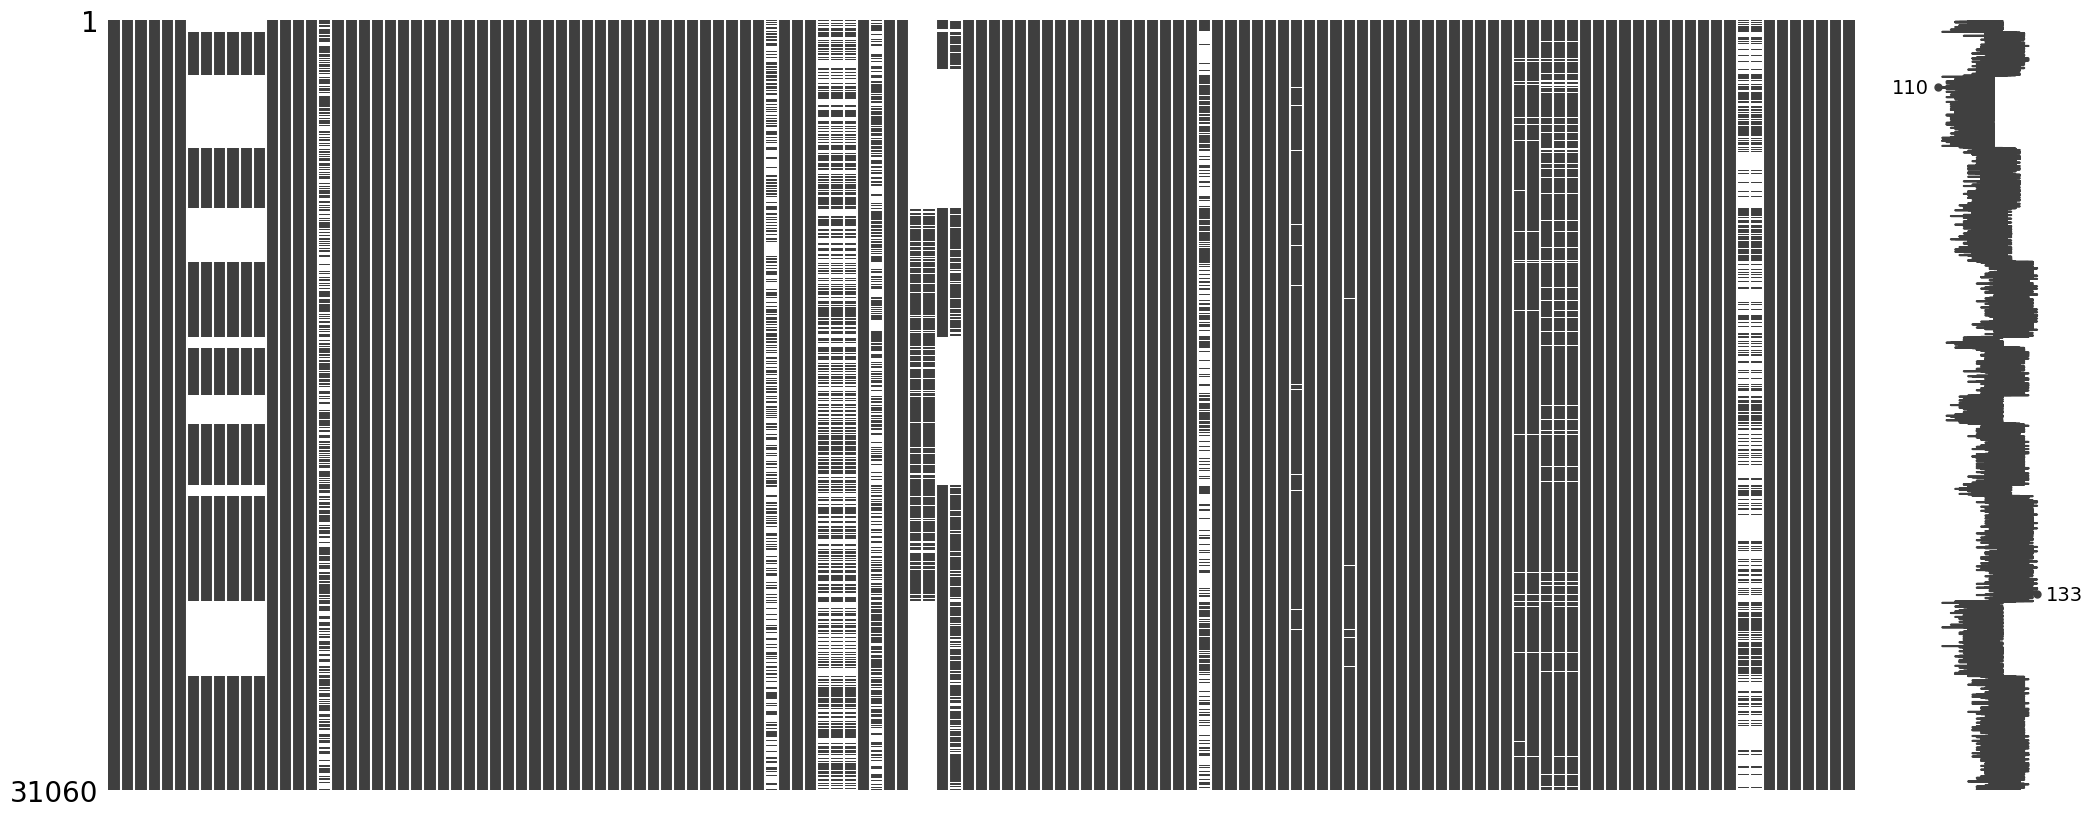

In [6]:
#Visualizing the missing data
import missingno as msno
%matplotlib inline
msno.matrix(df)

<Axes: >

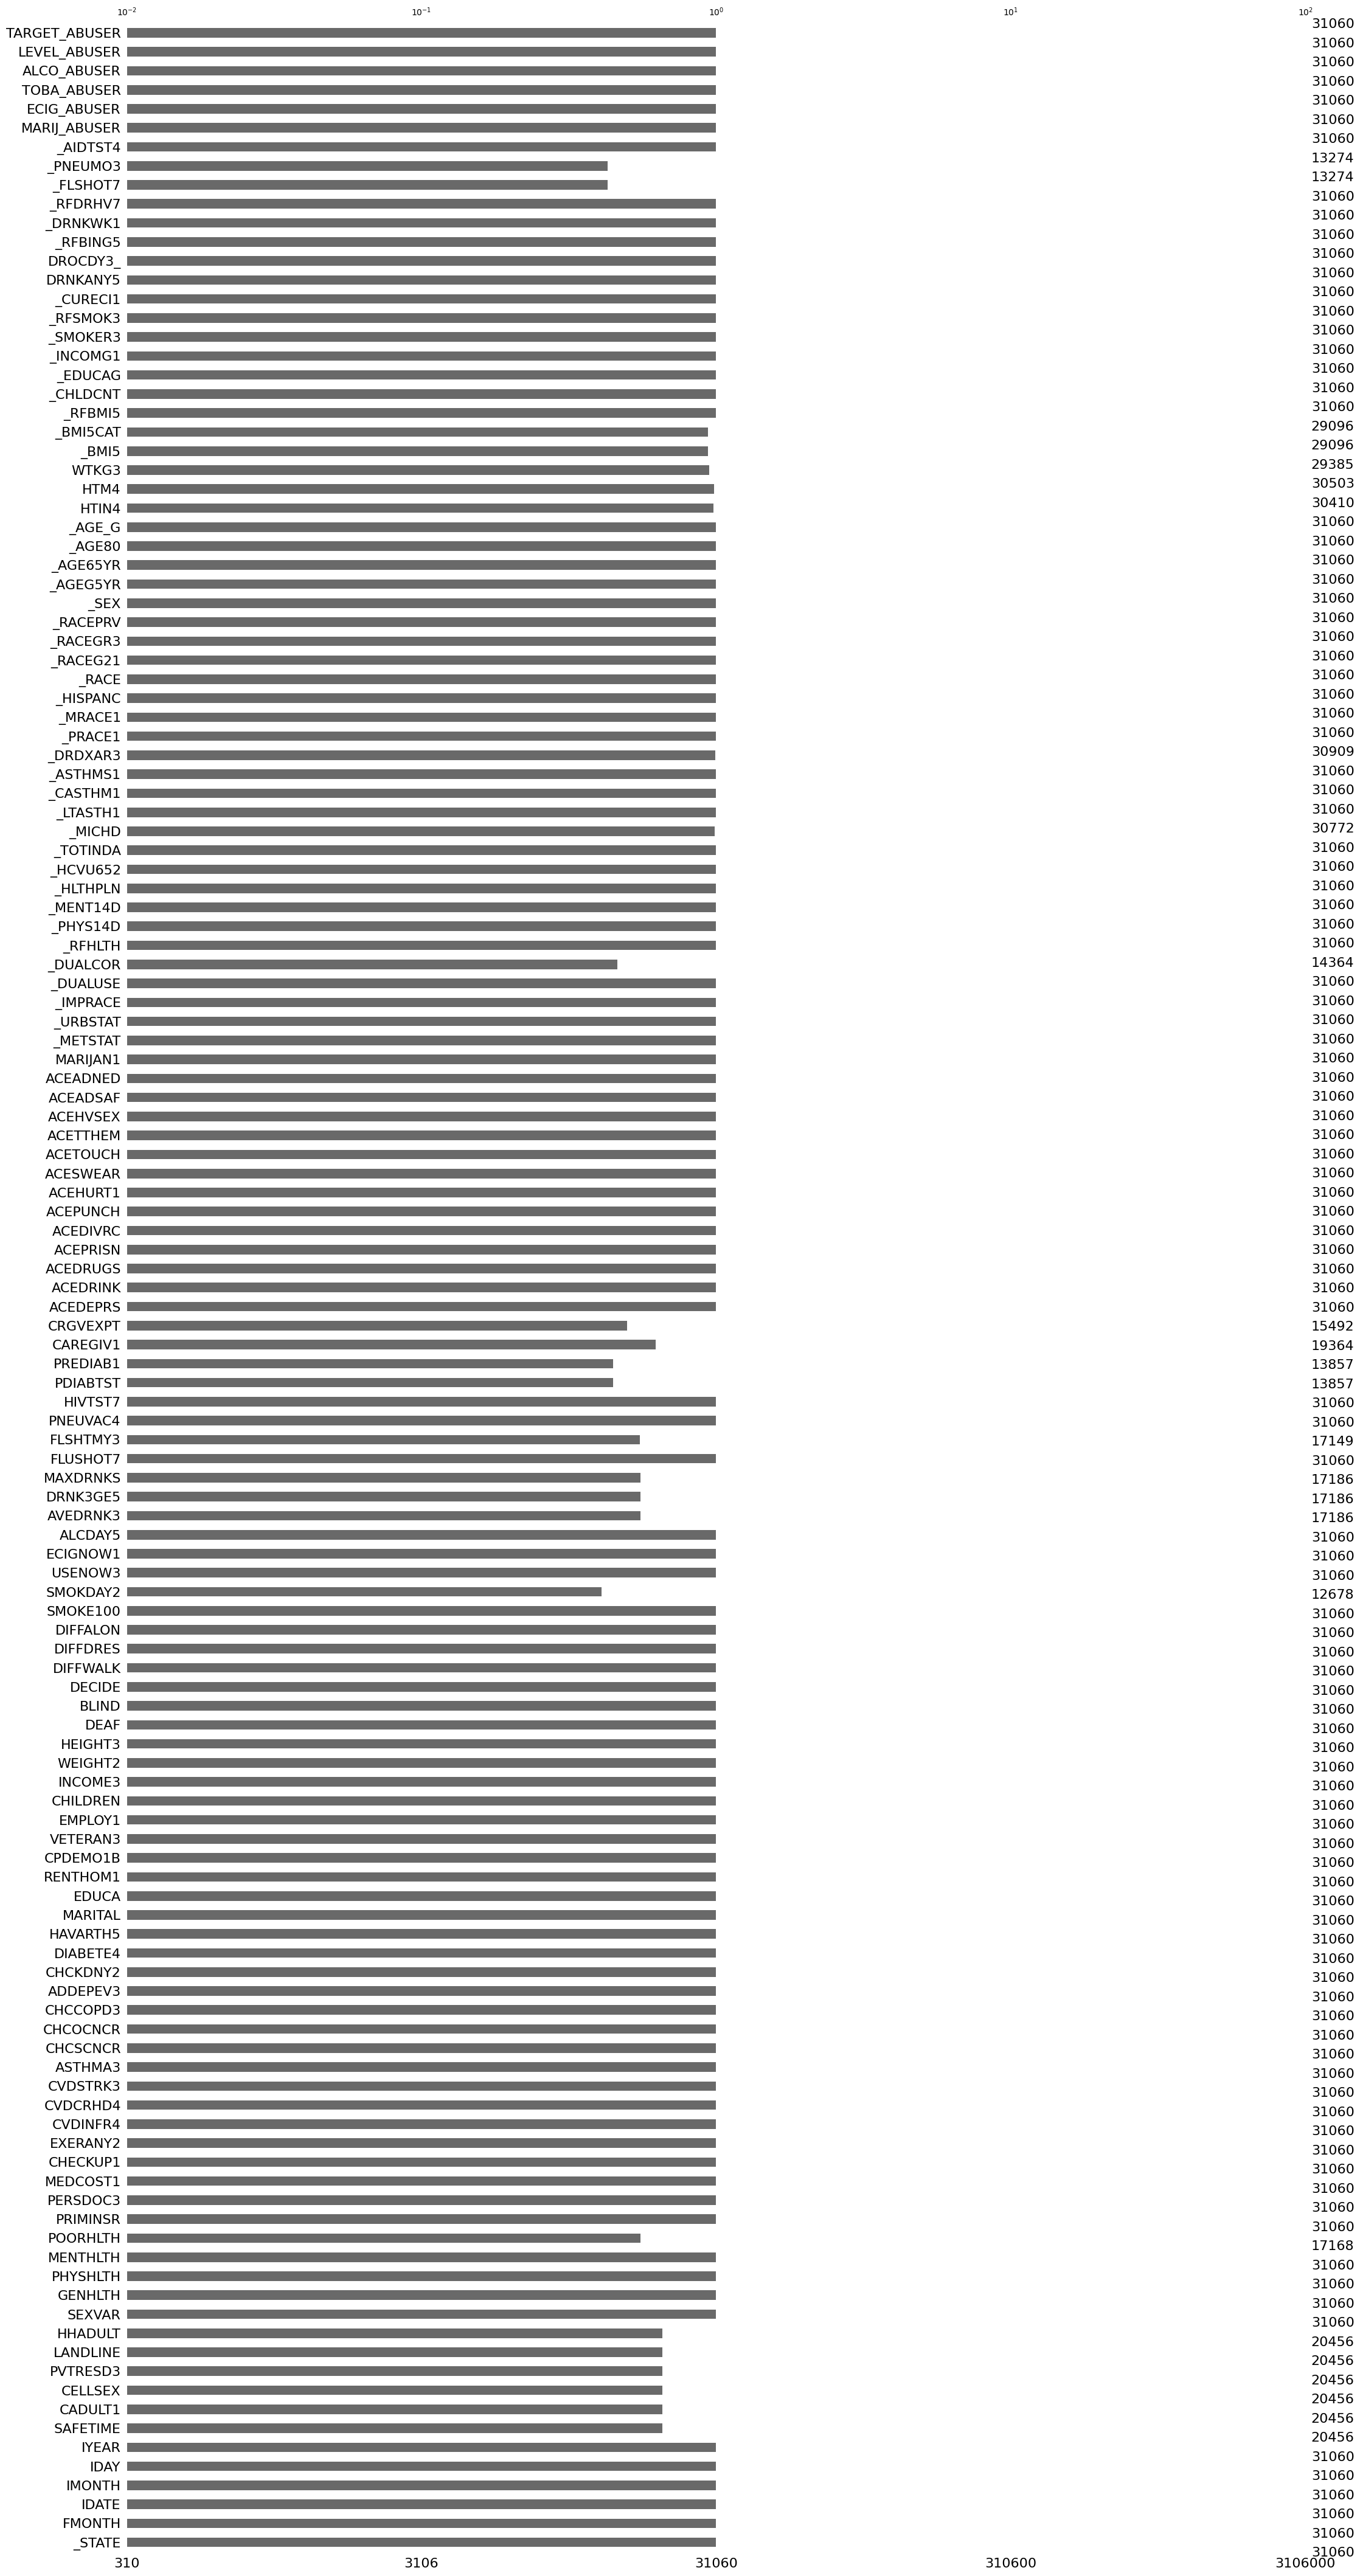

In [7]:
msno.bar(df,log=True)

<Axes: >

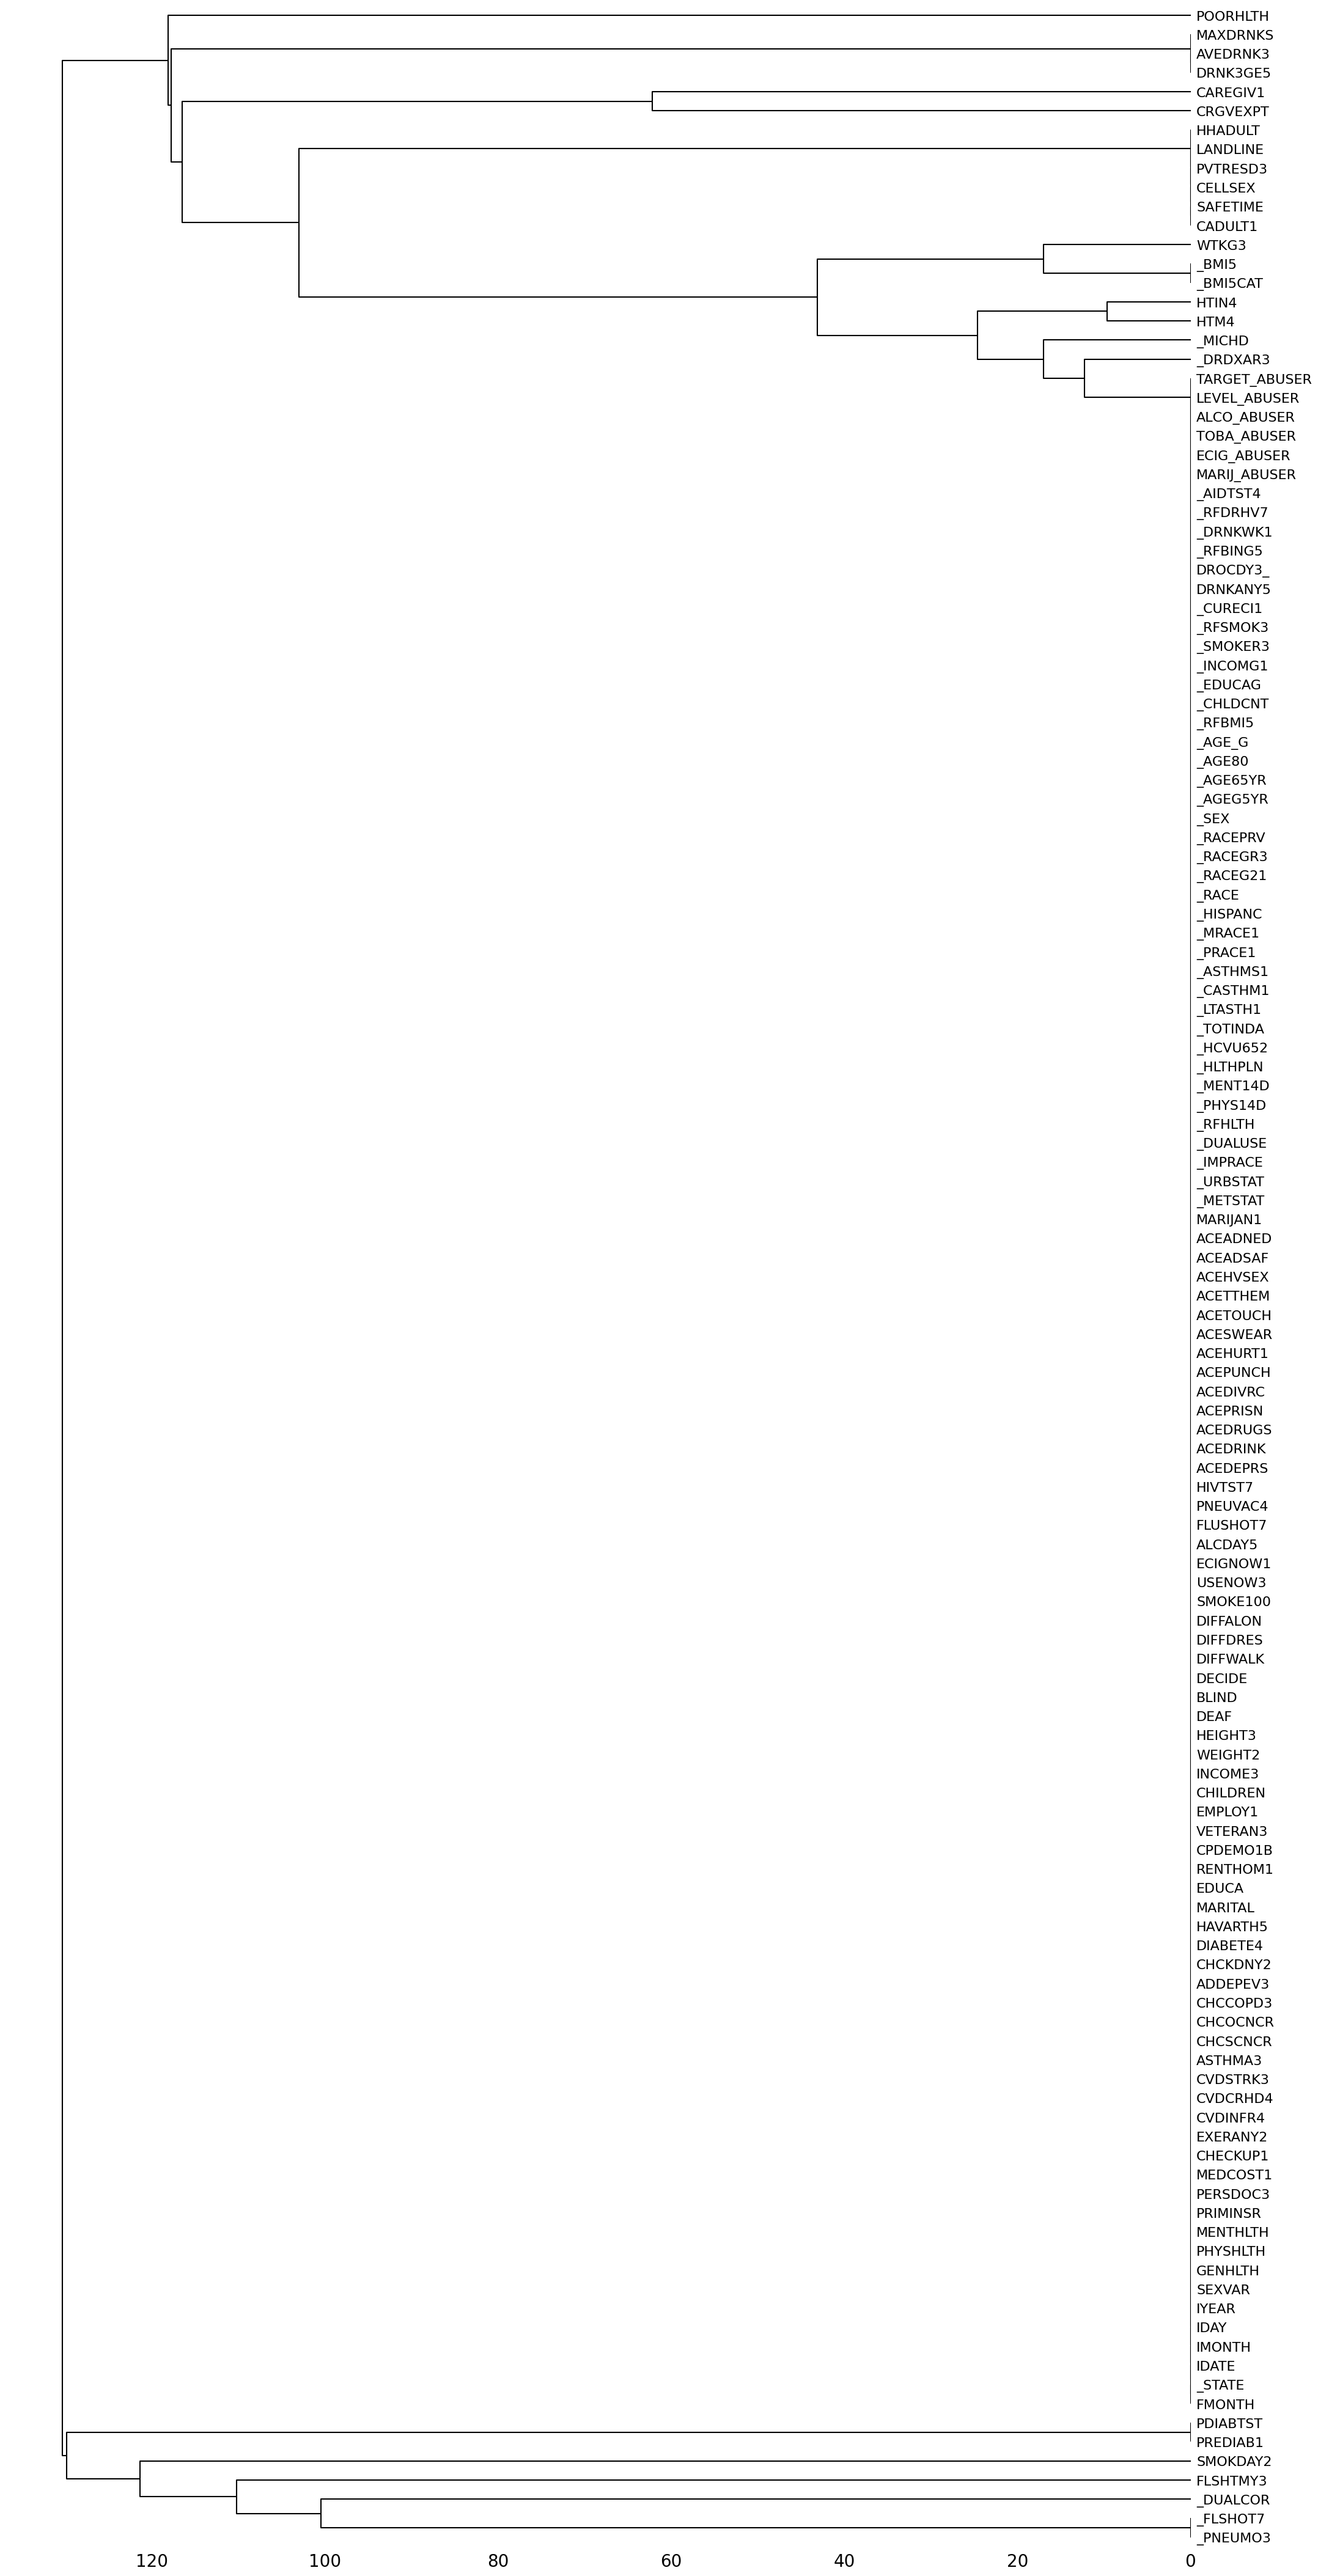

In [8]:
msno.dendrogram(df)

In [6]:
#Getting missing data in the dataset
df.isna().sum()

_STATE               0
FMONTH               0
IDATE                0
IMONTH               0
IDAY                 0
IYEAR                0
SAFETIME         10604
CADULT1          10604
CELLSEX          10604
PVTRESD3         10604
LANDLINE         10604
HHADULT          10604
SEXVAR               0
GENHLTH              0
PHYSHLTH             0
MENTHLTH             0
POORHLTH         13892
PRIMINSR             0
PERSDOC3             0
MEDCOST1             0
CHECKUP1             0
EXERANY2             0
CVDINFR4             0
CVDCRHD4             0
CVDSTRK3             0
ASTHMA3              0
CHCSCNCR             0
CHCOCNCR             0
CHCCOPD3             0
ADDEPEV3             0
CHCKDNY2             0
DIABETE4             0
HAVARTH5             0
MARITAL              0
EDUCA                0
RENTHOM1             0
CPDEMO1B             0
VETERAN3             0
EMPLOY1              0
CHILDREN             0
INCOME3              0
WEIGHT2              0
HEIGHT3              0
DEAF       

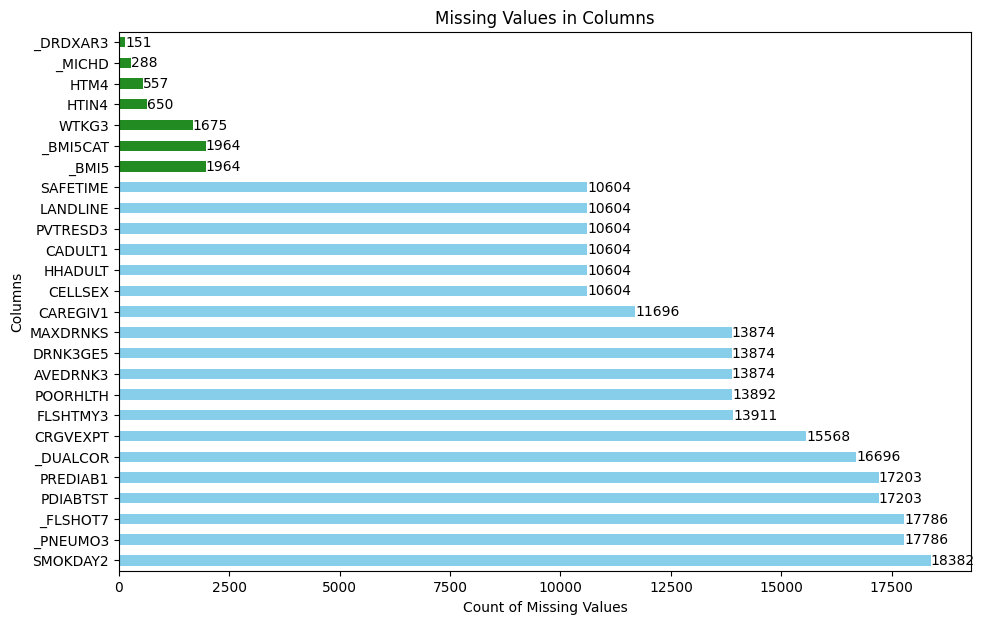

In [15]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]


# Sort columns by missing values count in descending order
missing_columns_sorted = missing_columns.sort_values(ascending=False)

# Plot
plt.figure(figsize=(11, 7))

# Define color for bars with missing values > 10000
colors = ['forestgreen' if count <= 10000 else 'skyblue' for count in missing_columns_sorted]

bars = missing_columns_sorted.plot(kind='barh', color=colors)
plt.title('Missing Values in Columns')
plt.ylabel('Columns')
plt.xlabel('Count of Missing Values')

# Add count labels on the right of each bar
for i, count in enumerate(missing_columns_sorted):
    plt.text(count, i, str(count), va='center')

plt.show()

In [10]:
# Creating a deep copies of the DataFrame
dfcopy = df.copy(deep=True)

In [11]:
#Dropping the columns used in calculating the output field
dfcopy.drop(['MARIJ_ABUSER','ECIG_ABUSER','TOBA_ABUSER','ALCO_ABUSER','LEVEL_ABUSER','MARIJAN1','USENOW3','ECIGNOW1','ALCDAY5'], axis = 1, inplace = True)

In [12]:
# Creating a deep copies of the DataFrame
df1 = dfcopy.copy(deep=True)
df2 = dfcopy.copy(deep=True)
df3 = dfcopy.copy(deep=True)
df4 = dfcopy.copy(deep=True)
df5 = dfcopy.copy(deep=True)
df6 = dfcopy.copy(deep=True)
df7 = dfcopy.copy(deep=True)
df8 = dfcopy.copy(deep=True)
df9 = dfcopy.copy(deep=True)

1.1 Filling up the missing data using Interpolation

In [13]:
df1 = df1.interpolate(method ='linear', axis=0, limit_direction ='both')
df1

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SAFETIME,CADULT1,CELLSEX,PVTRESD3,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,HIVTST7,PDIABTST,PREDIAB1,CAREGIV1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_DUALCOR,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,TARGET_ABUSER
0,32,1,2082021,2,8,2021,1.000,1.000,1.000,1.000,2.000,2.000,2,5,30,30,30.000,3,2,1,1,2,1,2,1,1,2,1,1,1,1,3,1,2,6,1,1,2,8,88,3,140,509,2,2,1,1,1,1,1,3.000,1.000,88.000,1.000,2,112020.000,2,1,1.000,3.000,1.000,1.000,1,2,2,2,1,2,2,1,1,1,1,4,4,1,1,1,1,0.491,2,3,3,1,1,2,1.000,2,2,1,1.000,1,1,2,1,1,1,1,2,9,1,61,5,69.000,175.000,6350.000,2067.000,2.000,1,1,4,2,3,1,1,2,0,1,0,1,1.000,2.000,1,0
1,32,1,2032021,2,3,2021,1.000,1.000,1.000,1.000,2.000,2.000,1,2,2,88,88.000,3,1,2,1,1,2,2,2,2,2,2,2,2,2,3,1,2,6,1,2,2,7,88,6,190,510,2,2,2,2,2,2,1,1.000,1.000,88.000,1.000,1,112020.000,2,1,1.000,3.000,2.000,1.000,2,1,2,2,2,3,3,3,1,1,1,4,5,1,1,6,1,0.491,1,2,1,1,9,1,2.000,1,1,3,1.000,5,5,2,5,2,3,5,1,11,2,71,6,70.000,178.000,8618.000,2726.000,3.000,2,1,4,4,1,2,1,1,3,1,23,1,1.000,2.000,1,0
2,32,1,2062021,2,6,2021,1.000,1.000,1.000,1.000,2.000,2.000,2,2,88,2,88.000,3,1,2,1,1,2,2,2,2,2,1,2,1,2,3,1,1,6,1,1,2,7,88,8,134,410,2,2,2,2,2,2,2,2.000,1.000,88.000,1.000,1,122020.000,1,2,1.000,3.000,1.000,1.500,2,2,2,2,2,1,1,1,1,1,1,5,5,1,1,1,1,0.491,1,1,2,1,9,1,2.000,1,1,3,1.000,1,1,2,1,1,1,1,2,11,2,74,6,58.000,147.000,6078.000,2801.000,3.000,2,1,4,5,4,1,1,1,3,1,23,1,1.000,1.000,2,0
3,32,1,3112021,3,11,2021,1.000,1.000,1.000,1.000,2.000,2.000,1,3,5,10,10.000,3,1,2,1,1,2,2,2,2,2,2,2,2,2,4,1,1,4,1,1,2,7,88,6,280,600,2,2,2,1,2,2,1,3.000,1.000,88.000,1.250,1,102020.000,1,1,1.000,3.000,2.000,2.000,2,2,2,2,2,1,1,1,1,1,1,5,5,1,1,1,1,0.491,1,2,2,1,9,1,2.000,1,1,3,1.000,1,1,2,1,1,1,1,1,10,2,65,6,72.000,183.000,12701.000,3797.000,4.000,2,1,2,4,3,1,1,2,0,1,0,1,1.000,1.000,1,0
4,32,1,2142021,2,14,2021,1.000,1.000,1.000,1.000,2.000,2.000,2,5,30,20,30.000,3,2,2,1,2,2,2,2,1,2,1,1,1,2,1,1,1,5,1,1,2,8,88,5,240,507,2,2,2,1,2,2,1,1.000,1.000,88.000,1.500,1,102020.000,2,2,1.000,3.000,1.000,2.000,1,1,2,2,1,1,1,1,1,1,1,3,5,1,1,1,1,0.491,2,3,3,1,1,2,2.000,2,2,1,1.000,1,1,2,1,1,1,1,2,9,1,60,5,67.000,170.000,10886.000,3759.000,4.000,2,1,3,3,1,2,1,2,0,1,0,1,1.500,1.500,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31055,51,10,10202022,10,20,2022,1.000,1.000,1.000,1.000,2.000,2.000,1,2,2,1,88.000,7,3,2,1,1,2,2,2,2,2,2,2,2,2,4,2,5,5,1,1,1,1,88,77,220,507,2,2,2,2,2,2,7,1.000,2.000,1.000,6.000,1,92022.000,2,1,1.000,3.000,2.000,2.000,2,2,2,1,1,1,1,2,1,1,1,4,5,1,1,1,9,0.428,1,2,2,1,1,1,2.000,1,1,3,2.000,1,1,2,1,1,1,1,1,5,1,40,3,67.000,170.000,9979.000,3446.000,4.000,2,1,3,9,9,9,1,1,23,2,327,1,2.000,2.000,1,0
31056,51,10,10202022,10,20,2022,1.000,1.000,2.000,1.000,2.000,1.000,2,1,88,88,51.000,5,2,2,1,2,2,2,2,2,2,2,2

In [14]:
#Checking the missing data
df1.isna().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
SAFETIME         0
CADULT1          0
CELLSEX          0
PVTRESD3         0
LANDLINE         0
HHADULT          0
SEXVAR           0
GENHLTH          0
PHYSHLTH         0
MENTHLTH         0
POORHLTH         0
PRIMINSR         0
PERSDOC3         0
MEDCOST1         0
CHECKUP1         0
EXERANY2         0
CVDINFR4         0
CVDCRHD4         0
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         0
CHCOCNCR         0
CHCCOPD3         0
ADDEPEV3         0
CHCKDNY2         0
DIABETE4         0
HAVARTH5         0
MARITAL          0
EDUCA            0
RENTHOM1         0
CPDEMO1B         0
VETERAN3         0
EMPLOY1          0
CHILDREN         0
INCOME3          0
WEIGHT2          0
HEIGHT3          0
DEAF             0
BLIND            0
DECIDE           0
DIFFWALK         0
DIFFDRES         0
DIFFALON         0
SMOKE100         0
SMOKDAY2         0
AVEDRNK3         0
DRNK3GE5    

In [15]:
#Scaling the data into 0-1
X = df1.drop(['TARGET_ABUSER'], axis=1)
y = df1['TARGET_ABUSER']
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.926087756416153
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7556
           1       0.87      0.70      0.78      1762

    accuracy                           0.92      9318
   macro avg       0.90      0.84      0.87      9318
weighted avg       0.92      0.92      0.92      9318

Area Under the Curve 0.8399808858142217
Confusion Matrix : 
[[7372  184]
 [ 521 1241]]


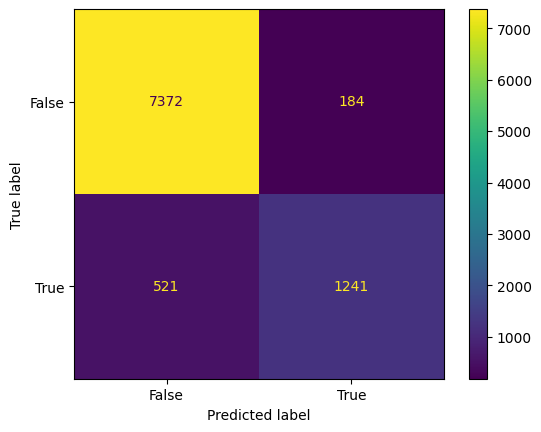

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.27506365241212816


1.2 Filling up the missing data using Mode

In [18]:
# Replace missing values with the mode for each column
for column in df2.columns:
    # Get the mode value
    mode_value = df2[column].mode().values[0]
    df2[column].fillna(mode_value, inplace=True)
df2

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SAFETIME,CADULT1,CELLSEX,PVTRESD3,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,HIVTST7,PDIABTST,PREDIAB1,CAREGIV1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_DUALCOR,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,TARGET_ABUSER
0,32,1,2082021,2,8,2021,1.000,1.000,1.000,1.000,2.000,2.000,2,5,30,30,30.000,3,2,1,1,2,1,2,1,1,2,1,1,1,1,3,1,2,6,1,1,2,8,88,3,140,509,2,2,1,1,1,1,1,3.000,1.000,88.000,1.000,2,102021.000,2,1,1.000,3.000,1.000,2.000,1,2,2,2,1,2,2,1,1,1,1,4,4,1,1,1,1,0.491,2,3,3,1,1,2,1.000,2,2,1,1.000,1,1,2,1,1,1,1,2,9,1,61,5,69.000,175.000,6350.000,2067.000,2.000,1,1,4,2,3,1,1,2,0,1,0,1,1.000,1.000,1,0
1,32,1,2032021,2,3,2021,1.000,1.000,1.000,1.000,2.000,2.000,1,2,2,88,88.000,3,1,2,1,1,2,2,2,2,2,2,2,2,2,3,1,2,6,1,2,2,7,88,6,190,510,2,2,2,2,2,2,1,1.000,1.000,88.000,1.000,1,112020.000,2,1,1.000,3.000,2.000,1.000,2,1,2,2,2,3,3,3,1,1,1,4,5,1,1,6,1,0.491,1,2,1,1,9,1,2.000,1,1,3,1.000,5,5,2,5,2,3,5,1,11,2,71,6,70.000,178.000,8618.000,2726.000,3.000,2,1,4,4,1,2,1,1,3,1,23,1,1.000,2.000,1,0
2,32,1,2062021,2,6,2021,1.000,1.000,1.000,1.000,2.000,2.000,2,2,88,2,88.000,3,1,2,1,1,2,2,2,2,2,1,2,1,2,3,1,1,6,1,1,2,7,88,8,134,410,2,2,2,2,2,2,2,3.000,1.000,88.000,1.000,1,122020.000,1,2,1.000,3.000,1.000,2.000,2,2,2,2,2,1,1,1,1,1,1,5,5,1,1,1,1,0.491,1,1,2,1,9,1,2.000,1,1,3,1.000,1,1,2,1,1,1,1,2,11,2,74,6,58.000,147.000,6078.000,2801.000,3.000,2,1,4,5,4,1,1,1,3,1,23,1,1.000,1.000,2,0
3,32,1,3112021,3,11,2021,1.000,1.000,1.000,1.000,2.000,2.000,1,3,5,10,10.000,3,1,2,1,1,2,2,2,2,2,2,2,2,2,4,1,1,4,1,1,2,7,88,6,280,600,2,2,2,1,2,2,1,3.000,1.000,88.000,1.000,1,102020.000,1,1,1.000,3.000,2.000,2.000,2,2,2,2,2,1,1,1,1,1,1,5,5,1,1,1,1,0.491,1,2,2,1,9,1,2.000,1,1,3,1.000,1,1,2,1,1,1,1,1,10,2,65,6,72.000,183.000,12701.000,3797.000,4.000,2,1,2,4,3,1,1,2,0,1,0,1,1.000,1.000,1,0
4,32,1,2142021,2,14,2021,1.000,1.000,1.000,1.000,2.000,2.000,2,5,30,20,30.000,3,2,2,1,2,2,2,2,1,2,1,1,1,2,1,1,1,5,1,1,2,8,88,5,240,507,2,2,2,1,2,2,1,1.000,1.000,88.000,1.000,1,102020.000,2,2,1.000,3.000,1.000,2.000,1,1,2,2,1,1,1,1,1,1,1,3,5,1,1,1,1,0.491,2,3,3,1,1,2,2.000,2,2,1,1.000,1,1,2,1,1,1,1,2,9,1,60,5,67.000,170.000,10886.000,3759.000,4.000,2,1,3,3,1,2,1,2,0,1,0,1,1.000,1.000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31055,51,10,10202022,10,20,2022,1.000,1.000,1.000,1.000,2.000,2.000,1,2,2,1,88.000,7,3,2,1,1,2,2,2,2,2,2,2,2,2,4,2,5,5,1,1,1,1,88,77,220,507,2,2,2,2,2,2,7,3.000,2.000,1.000,6.000,1,92022.000,2,1,1.000,3.000,2.000,2.000,2,2,2,1,1,1,1,2,1,1,1,4,5,1,1,1,9,0.572,1,2,2,1,1,1,2.000,1,1,3,2.000,1,1,2,1,1,1,1,1,5,1,40,3,67.000,170.000,9979.000,3446.000,4.000,2,1,3,9,9,9,1,1,23,2,327,1,1.000,1.000,1,0
31056,51,10,10202022,10,20,2022,1.000,1.000,2.000,1.000,2.000,1.000,2,1,88,88,88.000,5,2,2,1,2,2,2,2,2,2,2,2

In [19]:
#Checking the missing data
df2.isna().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
SAFETIME         0
CADULT1          0
CELLSEX          0
PVTRESD3         0
LANDLINE         0
HHADULT          0
SEXVAR           0
GENHLTH          0
PHYSHLTH         0
MENTHLTH         0
POORHLTH         0
PRIMINSR         0
PERSDOC3         0
MEDCOST1         0
CHECKUP1         0
EXERANY2         0
CVDINFR4         0
CVDCRHD4         0
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         0
CHCOCNCR         0
CHCCOPD3         0
ADDEPEV3         0
CHCKDNY2         0
DIABETE4         0
HAVARTH5         0
MARITAL          0
EDUCA            0
RENTHOM1         0
CPDEMO1B         0
VETERAN3         0
EMPLOY1          0
CHILDREN         0
INCOME3          0
WEIGHT2          0
HEIGHT3          0
DEAF             0
BLIND            0
DECIDE           0
DIFFWALK         0
DIFFDRES         0
DIFFALON         0
SMOKE100         0
SMOKDAY2         0
AVEDRNK3         0
DRNK3GE5    

In [20]:
#Scaling the data into 0-1
X = df2.drop(['TARGET_ABUSER'], axis=1)
y = df2['TARGET_ABUSER']
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9256278171281391
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7594
           1       0.86      0.70      0.77      1724

    accuracy                           0.92      9318
   macro avg       0.90      0.84      0.86      9318
weighted avg       0.92      0.92      0.92      9318

Area Under the Curve 0.838220673666535
Confusion Matrix : 
[[7401  193]
 [ 514 1210]]


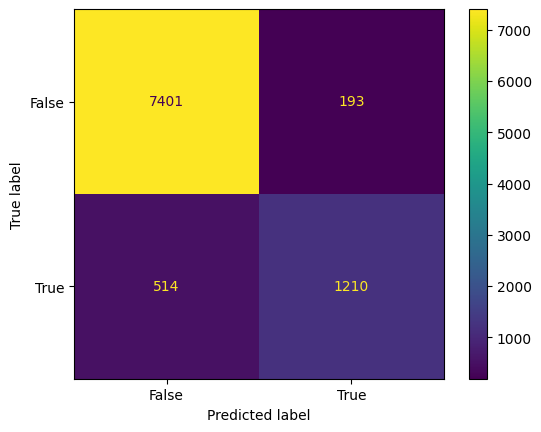

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.275453537302948


1.3 Filling up the missing data using Median

In [23]:
X = df3.drop(['TARGET_ABUSER'], axis=1)
y = df3['TARGET_ABUSER']
# To calculate median use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=pd.NA, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)
X

array([[3.2000000e+01, 1.0000000e+00, 2.0820210e+06, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [3.2000000e+01, 1.0000000e+00, 2.0320210e+06, ..., 1.0000000e+00,
        2.0000000e+00, 1.0000000e+00],
       [3.2000000e+01, 1.0000000e+00, 2.0620210e+06, ..., 1.0000000e+00,
        1.0000000e+00, 2.0000000e+00],
       ...,
       [5.1000000e+01, 1.1000000e+01, 1.2292022e+07, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [5.1000000e+01, 1.1000000e+01, 1.2292022e+07, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [5.1000000e+01, 1.1000000e+01, 1.2292022e+07, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

array([[0.        , 0.        , 0.09469018, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0902654 , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 0.09292027, ..., 0.        , 0.        ,
        0.125     ],
       ...,
       [1.        , 0.90909091, 0.99823009, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9249839021249195
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7597
           1       0.86      0.69      0.77      1721

    accuracy                           0.92      9318
   macro avg       0.90      0.83      0.86      9318
weighted avg       0.92      0.92      0.92      9318

Area Under the Curve 0.8347042017946931
Confusion Matrix : 
[[7403  194]
 [ 525 1196]]


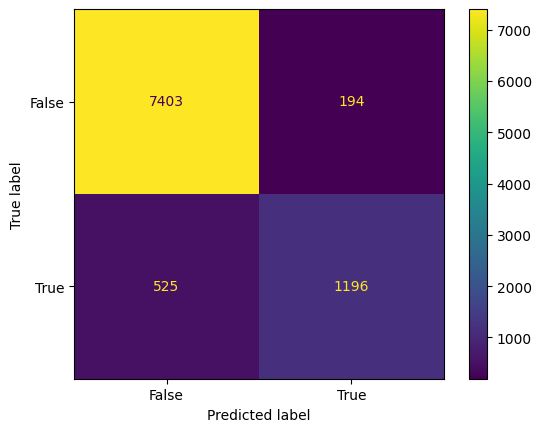

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.2777813550603167


1.4 Filling up the missing values using Mean

In [28]:
X = df4.drop(['TARGET_ABUSER'], axis=1)
y = df4['TARGET_ABUSER']
# To calculate median use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X

array([[3.20000000e+01, 1.00000000e+00, 2.08202100e+06, ...,
        1.62957662e+00, 1.81467531e+00, 1.00000000e+00],
       [3.20000000e+01, 1.00000000e+00, 2.03202100e+06, ...,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [3.20000000e+01, 1.00000000e+00, 2.06202100e+06, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       ...,
       [5.10000000e+01, 1.10000000e+01, 1.22920220e+07, ...,
        1.62957662e+00, 1.81467531e+00, 1.00000000e+00],
       [5.10000000e+01, 1.10000000e+01, 1.22920220e+07, ...,
        1.62957662e+00, 1.81467531e+00, 1.00000000e+00],
       [5.10000000e+01, 1.10000000e+01, 1.22920220e+07, ...,
        1.62957662e+00, 1.81467531e+00, 1.00000000e+00]])

In [29]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

array([[0.        , 0.        , 0.09469018, ..., 0.07869708, 0.10183441,
        0.        ],
       [0.        , 0.        , 0.0902654 , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 0.09292027, ..., 0.        , 0.        ,
        0.125     ],
       ...,
       [1.        , 0.90909091, 0.99823009, ..., 0.07869708, 0.10183441,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.07869708, 0.10183441,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.07869708, 0.10183441,
        0.        ]])

In [30]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9245239628369055
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7575
           1       0.88      0.69      0.77      1743

    accuracy                           0.92      9318
   macro avg       0.90      0.83      0.86      9318
weighted avg       0.92      0.92      0.92      9318

Area Under the Curve 0.8348001340581562
Confusion Matrix : 
[[7406  169]
 [ 537 1206]]


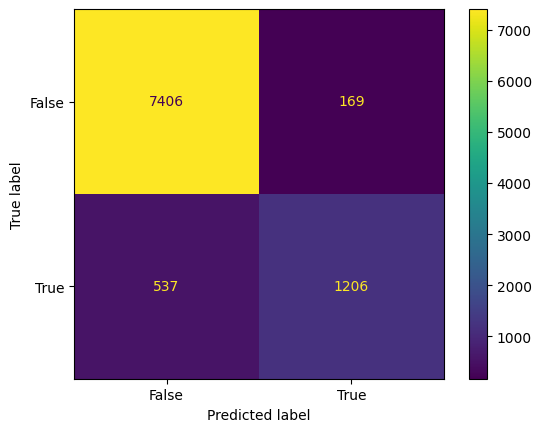

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.27525866388817505


1.5 Filling up the missing values using Iterative Imputer of Scikit learn library - 4mins

In [33]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df5)
df5_imputed = pd.DataFrame(imputed, columns=df5.columns)
round(df5_imputed, 2)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SAFETIME,CADULT1,CELLSEX,PVTRESD3,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,HIVTST7,PDIABTST,PREDIAB1,CAREGIV1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_DUALCOR,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,TARGET_ABUSER
0,32.000,1.000,2082021.000,2.000,8.000,2021.000,1.000,1.000,2.000,1.010,0.800,3.140,2.000,5.000,30.000,30.000,30.000,3.000,2.000,1.000,1.000,2.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,3.000,1.000,2.000,6.000,1.000,1.000,2.000,8.000,88.000,3.000,140.000,509.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,3.000,2.520,92.970,0.870,2.000,150950.800,2.000,1.000,0.580,2.230,1.000,1.600,1.000,2.000,2.000,2.000,1.000,2.000,2.000,1.000,1.000,1.000,1.000,4.000,4.000,1.000,1.000,1.000,1.000,0.490,2.000,3.000,3.000,1.000,1.000,2.000,1.000,2.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,9.000,1.000,61.000,5.000,69.000,175.000,6350.000,2067.000,2.000,1.000,1.000,4.000,2.000,3.000,1.000,1.000,2.000,0.000,1.000,0.000,1.000,-4.680,-4.510,1.000,0.000
1,32.000,1.000,2032021.000,2.000,3.000,2021.000,1.000,1.000,1.010,1.000,0.880,4.370,1.000,2.000,2.000,88.000,88.000,3.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,1.000,2.000,6.000,1.000,2.000,2.000,7.000,88.000,6.000,190.000,510.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,88.000,1.000,1.000,112020.000,2.000,1.000,0.300,2.570,2.000,1.000,2.000,1.000,2.000,2.000,2.000,3.000,3.000,3.000,1.000,1.000,1.000,4.000,5.000,1.000,1.000,6.000,1.000,0.490,1.000,2.000,1.000,1.000,9.000,1.000,2.000,1.000,1.000,3.000,1.000,5.000,5.000,2.000,5.000,2.000,3.000,5.000,1.000,11.000,2.000,71.000,6.000,70.000,178.000,8618.000,2726.000,3.000,2.000,1.000,4.000,4.000,1.000,2.000,1.000,1.000,3.000,1.000,23.000,1.000,1.000,2.000,1.000,0.000
2,32.000,1.000,2062021.000,2.000,6.000,2021.000,1.000,1.000,2.000,1.000,0.810,1.460,2.000,2.000,88.000,2.000,88.000,3.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,1.000,2.000,1.000,2.000,3.000,1.000,1.000,6.000,1.000,1.000,2.000,7.000,88.000,8.000,134.000,410.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.950,1.000,88.000,1.000,1.000,122020.000,1.000,2.000,0.620,2.560,1.000,1.600,2.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,5.000,1.000,1.000,1.000,1.000,0.490,1.000,1.000,2.000,1.000,9.000,1.000,2.000,1.000,1.000,3.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,11.000,2.000,74.000,6.000,58.000,147.000,6078.000,2801.000,3.000,2.000,1.000,4.000,5.000,4.000,1.000,1.000,1.000,3.000,1.000,23.000,1.000,1.000,1.000,2.000,0.000
3,32.000,1.000,3112021.000,3.000,11.000,2021.000,1.000,1.000,1.000,1.010,0.830,1.260,1.000,3.000,5.000,10.000,10.000,3.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,4.000,1.000,1.000,4.000,1.000,1.000,2.000,7.000,88.000,6.000,280.000,600.000,2.000,2.000,2.000,1.000,2.000,2.000,1.000,3.000,2.700,76.410,1.240,1.000,102020.000,1.000,1.000,0.520,1.980,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,5.000,1.000,1.000,1.000,1.000,0.490,1.000,2.000,2.000,1.000,9.000,1.000,2.000,1.000,1.000,3.000,1.000,1.000,1.000,2.000,1.000,1.000,1.00

In [34]:
#Checking the missing data
df5_imputed.isna().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
SAFETIME         0
CADULT1          0
CELLSEX          0
PVTRESD3         0
LANDLINE         0
HHADULT          0
SEXVAR           0
GENHLTH          0
PHYSHLTH         0
MENTHLTH         0
POORHLTH         0
PRIMINSR         0
PERSDOC3         0
MEDCOST1         0
CHECKUP1         0
EXERANY2         0
CVDINFR4         0
CVDCRHD4         0
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         0
CHCOCNCR         0
CHCCOPD3         0
ADDEPEV3         0
CHCKDNY2         0
DIABETE4         0
HAVARTH5         0
MARITAL          0
EDUCA            0
RENTHOM1         0
CPDEMO1B         0
VETERAN3         0
EMPLOY1          0
CHILDREN         0
INCOME3          0
WEIGHT2          0
HEIGHT3          0
DEAF             0
BLIND            0
DECIDE           0
DIFFWALK         0
DIFFDRES         0
DIFFALON         0
SMOKE100         0
SMOKDAY2         0
AVEDRNK3         0
DRNK3GE5    

In [35]:
#Scaling the data into 0-1
X = df5_imputed.drop(['TARGET_ABUSER'], axis=1)
y = df5_imputed['TARGET_ABUSER']
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

array([[0.        , 0.        , 0.09469018, ..., 0.48633038, 0.42434455,
        0.        ],
       [0.        , 0.        , 0.0902654 , ..., 0.69964144, 0.70178943,
        0.        ],
       [0.        , 0.        , 0.09292027, ..., 0.69964144, 0.65918792,
        0.125     ],
       ...,
       [1.        , 0.90909091, 0.99823009, ..., 0.48065446, 0.35948058,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.44023583, 0.41999429,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.4864924 , 0.3659401 ,
        0.        ]])

In [36]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9256278171281391
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      7544
         1.0       0.87      0.71      0.78      1774

    accuracy                           0.93      9318
   macro avg       0.90      0.84      0.87      9318
weighted avg       0.92      0.93      0.92      9318

Area Under the Curve 0.8445098040387786
Confusion Matrix : 
[[7354  190]
 [ 507 1267]]


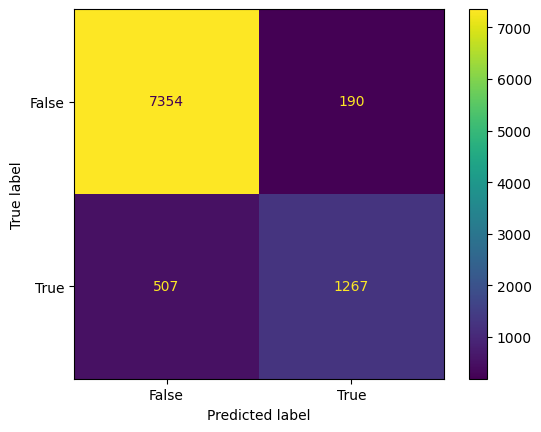

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.2734985549151475


1.6 Removing the columns with missing value

In [39]:
df6.drop(['SAFETIME','CADULT1','CELLSEX','PVTRESD3','LANDLINE','HHADULT','POORHLTH','SMOKDAY2','AVEDRNK3','DRNK3GE5','MAXDRNKS',
          'FLSHTMY3','PDIABTST','PREDIAB1','CAREGIV1','CRGVEXPT','_DUALCOR','_MICHD','_DRDXAR3','HTIN4','HTM4','WTKG3','_BMI5',
          '_BMI5CAT','_FLSHOT7','_PNEUMO3'], axis = 1, inplace = True)

In [40]:
#Scaling the data into 0-1
X = df6.drop(['TARGET_ABUSER'], axis=1)
y = df6['TARGET_ABUSER']
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

array([[0.00000000e+00, 0.00000000e+00, 9.46901770e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.02653982e-02, ...,
        2.30230230e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.29202655e-02, ...,
        2.30230230e-04, 0.00000000e+00, 1.25000000e-01],
       ...,
       [1.00000000e+00, 9.09090909e-01, 9.98230088e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.09090909e-01, 9.98230088e-01, ...,
        2.80280280e-03, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.09090909e-01, 9.98230088e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [41]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9247539324809125
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7591
           1       0.86      0.72      0.78      1727

    accuracy                           0.93      9318
   macro avg       0.90      0.84      0.87      9318
weighted avg       0.92      0.93      0.92      9318

Area Under the Curve 0.8448563146999194
Confusion Matrix : 
[[7385  206]
 [ 489 1238]]


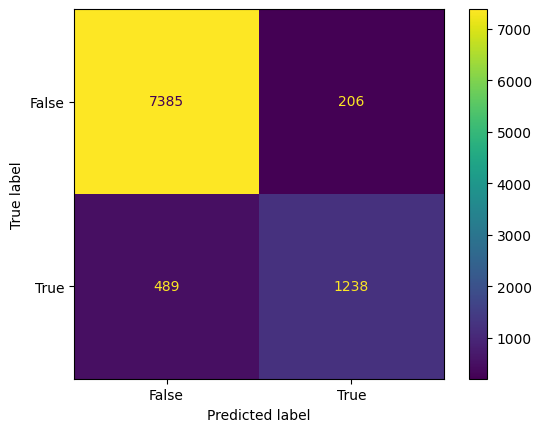

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.2731058791133348


1.7 Using MICE Algorithm from fancyimpute - 4mins

In [44]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=1d386beb46df22ced526262992aad39150b3ef95088c55ecffa82f3f86d2ec40
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=d6cffe66f59fe0a5e3116725e1bb62981a0cd15db96df0a42c1a026c90111a9a
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [45]:
from fancyimpute import IterativeImputer

In [46]:
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df7), columns=df7.columns)
df_imputed

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SAFETIME,CADULT1,CELLSEX,PVTRESD3,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,HIVTST7,PDIABTST,PREDIAB1,CAREGIV1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_DUALCOR,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,TARGET_ABUSER
0,32.000,1.000,2082021.000,2.000,8.000,2021.000,1.000,1.000,2.004,1.006,0.798,3.137,2.000,5.000,30.000,30.000,30.000,3.000,2.000,1.000,1.000,2.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,3.000,1.000,2.000,6.000,1.000,1.000,2.000,8.000,88.000,3.000,140.000,509.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,3.000,2.524,92.965,0.872,2.000,150950.805,2.000,1.000,0.580,2.231,1.000,1.602,1.000,2.000,2.000,2.000,1.000,2.000,2.000,1.000,1.000,1.000,1.000,4.000,4.000,1.000,1.000,1.000,1.000,0.491,2.000,3.000,3.000,1.000,1.000,2.000,1.000,2.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,9.000,1.000,61.000,5.000,69.000,175.000,6350.000,2067.000,2.000,1.000,1.000,4.000,2.000,3.000,1.000,1.000,2.000,0.000,1.000,0.000,1.000,-4.682,-4.513,1.000,0.000
1,32.000,1.000,2032021.000,2.000,3.000,2021.000,1.000,1.000,1.015,0.999,0.879,4.374,1.000,2.000,2.000,88.000,88.000,3.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,1.000,2.000,6.000,1.000,2.000,2.000,7.000,88.000,6.000,190.000,510.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,88.000,1.000,1.000,112020.000,2.000,1.000,0.298,2.571,2.000,1.000,2.000,1.000,2.000,2.000,2.000,3.000,3.000,3.000,1.000,1.000,1.000,4.000,5.000,1.000,1.000,6.000,1.000,0.491,1.000,2.000,1.000,1.000,9.000,1.000,2.000,1.000,1.000,3.000,1.000,5.000,5.000,2.000,5.000,2.000,3.000,5.000,1.000,11.000,2.000,71.000,6.000,70.000,178.000,8618.000,2726.000,3.000,2.000,1.000,4.000,4.000,1.000,2.000,1.000,1.000,3.000,1.000,23.000,1.000,1.000,2.000,1.000,0.000
2,32.000,1.000,2062021.000,2.000,6.000,2021.000,1.000,1.000,1.999,0.998,0.806,1.461,2.000,2.000,88.000,2.000,88.000,3.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,1.000,2.000,1.000,2.000,3.000,1.000,1.000,6.000,1.000,1.000,2.000,7.000,88.000,8.000,134.000,410.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.948,1.000,88.000,1.000,1.000,122020.000,1.000,2.000,0.620,2.562,1.000,1.595,2.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,5.000,1.000,1.000,1.000,1.000,0.491,1.000,1.000,2.000,1.000,9.000,1.000,2.000,1.000,1.000,3.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,11.000,2.000,74.000,6.000,58.000,147.000,6078.000,2801.000,3.000,2.000,1.000,4.000,5.000,4.000,1.000,1.000,1.000,3.000,1.000,23.000,1.000,1.000,1.000,2.000,0.000
3,32.000,1.000,3112021.000,3.000,11.000,2021.000,1.000,1.000,0.996,1.012,0.833,1.264,1.000,3.000,5.000,10.000,10.000,3.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,4.000,1.000,1.000,4.000,1.000,1.000,2.000,7.000,88.000,6.000,280.000,600.000,2.000,2.000,2.000,1.000,2.000,2.000,1.000,3.000,2.701,76.407,1.236,1.000,102020.000,1.000,1.000,0.520,1.983,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,5.000,1.000,1.000,1.000,1.000,0.491,1.000,2.000,2.000,1.000,9.000,1.000,2.000,1.000,1.000,3.000,1.000,1.000,1.000,2.000,1.000,1.000,1.00

In [47]:
#Checking the missing data
df_imputed.isna().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
SAFETIME         0
CADULT1          0
CELLSEX          0
PVTRESD3         0
LANDLINE         0
HHADULT          0
SEXVAR           0
GENHLTH          0
PHYSHLTH         0
MENTHLTH         0
POORHLTH         0
PRIMINSR         0
PERSDOC3         0
MEDCOST1         0
CHECKUP1         0
EXERANY2         0
CVDINFR4         0
CVDCRHD4         0
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         0
CHCOCNCR         0
CHCCOPD3         0
ADDEPEV3         0
CHCKDNY2         0
DIABETE4         0
HAVARTH5         0
MARITAL          0
EDUCA            0
RENTHOM1         0
CPDEMO1B         0
VETERAN3         0
EMPLOY1          0
CHILDREN         0
INCOME3          0
WEIGHT2          0
HEIGHT3          0
DEAF             0
BLIND            0
DECIDE           0
DIFFWALK         0
DIFFDRES         0
DIFFALON         0
SMOKE100         0
SMOKDAY2         0
AVEDRNK3         0
DRNK3GE5    

In [48]:
#Scaling the data into 0-1
X = df_imputed.drop(['TARGET_ABUSER'], axis=1)
y = df_imputed['TARGET_ABUSER']
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

array([[0.        , 0.        , 0.09469018, ..., 0.48633038, 0.42434455,
        0.        ],
       [0.        , 0.        , 0.0902654 , ..., 0.69964144, 0.70178943,
        0.        ],
       [0.        , 0.        , 0.09292027, ..., 0.69964144, 0.65918792,
        0.125     ],
       ...,
       [1.        , 0.90909091, 0.99823009, ..., 0.48065446, 0.35948058,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.44023583, 0.41999429,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.4864924 , 0.3659401 ,
        0.        ]])

In [49]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9244779689081041
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      7520
         1.0       0.88      0.72      0.80      1798

    accuracy                           0.93      9318
   macro avg       0.91      0.85      0.88      9318
weighted avg       0.93      0.93      0.93      9318

Area Under the Curve 0.8506449246207369
Confusion Matrix : 
[[7344  176]
 [ 495 1303]]


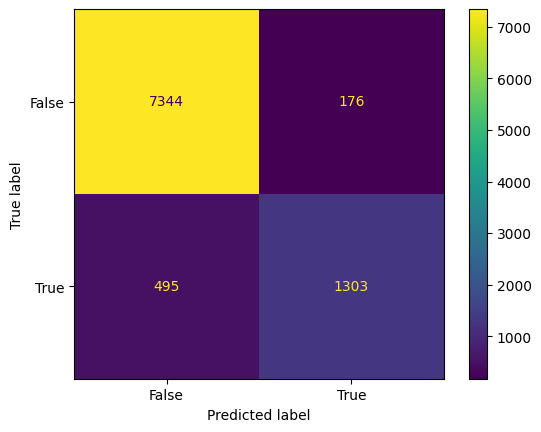

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.268348954149982


1.8 Using KNN Imputer - 10 mins

In [52]:
X = df8.drop(['TARGET_ABUSER'], axis=1)
y = df8['TARGET_ABUSER']
from sklearn.impute import KNNImputer
# creating a data frame from the list
Before_imputation = pd.DataFrame(X)
#print dataset before imputation
print("Data Before performing imputation\n",Before_imputation)

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",After_imputation)

Data Before performing imputation
        _STATE  FMONTH     IDATE  IMONTH  IDAY  IYEAR  SAFETIME  CADULT1  CELLSEX  PVTRESD3  LANDLINE  HHADULT  SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  POORHLTH  PRIMINSR  PERSDOC3  MEDCOST1  CHECKUP1  EXERANY2  CVDINFR4  CVDCRHD4  CVDSTRK3  ASTHMA3  CHCSCNCR  CHCOCNCR  CHCCOPD3  ADDEPEV3  CHCKDNY2  DIABETE4  HAVARTH5  MARITAL  EDUCA  RENTHOM1  CPDEMO1B  VETERAN3  EMPLOY1  CHILDREN  INCOME3  WEIGHT2  HEIGHT3  DEAF  BLIND  DECIDE  DIFFWALK  DIFFDRES  DIFFALON  SMOKE100  SMOKDAY2  AVEDRNK3  DRNK3GE5  MAXDRNKS  FLUSHOT7   FLSHTMY3  PNEUVAC4  HIVTST7  PDIABTST  PREDIAB1  CAREGIV1  CRGVEXPT  ACEDEPRS  ACEDRINK  ACEDRUGS  ACEPRISN  ACEDIVRC  ACEPUNCH  ACEHURT1  ACESWEAR  ACETOUCH  ACETTHEM  ACEHVSEX  ACEADSAF  ACEADNED  _METSTAT  _URBSTAT  _IMPRACE  _DUALUSE  _DUALCOR  _RFHLTH  _PHYS14D  _MENT14D  _HLTHPLN  _HCVU652  _TOTINDA  _MICHD  _LTASTH1  _CASTHM1  _ASTHMS1  _DRDXAR3  _PRACE1  _MRACE1  _HISPANC  _RACE  _RACEG21  _RACEGR3  _RACEPRV  _SEX  _AGEG5YR  _AGE65Y

In [53]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(After_imputation)
X

array([[0.        , 0.        , 0.09469018, ..., 0.0625    , 0.0625    ,
        0.        ],
       [0.        , 0.        , 0.0902654 , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 0.09292027, ..., 0.        , 0.        ,
        0.125     ],
       ...,
       [1.        , 0.90909091, 0.99823009, ..., 0.0625    , 0.0625    ,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.0625    , 0.0625    ,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.0625    , 0.0625    ,
        0.        ]])

In [54]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9249379081961181
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7591
           1       0.86      0.71      0.78      1727

    accuracy                           0.93      9318
   macro avg       0.90      0.84      0.87      9318
weighted avg       0.92      0.93      0.92      9318

Area Under the Curve 0.8434883536617319
Confusion Matrix : 
[[7395  196]
 [ 496 1231]]


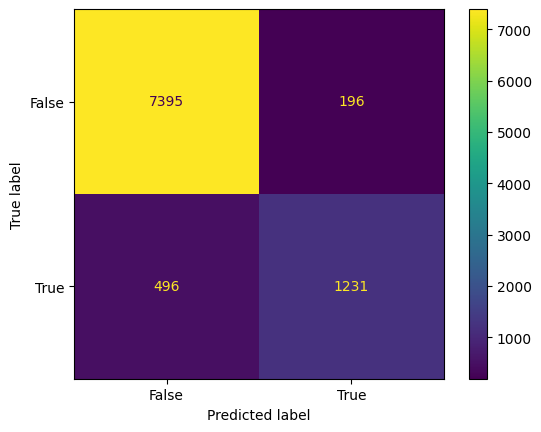

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.27251580450435836


1.9 Expectation Maximization Algorithm - 28 mins

In [57]:
!pip install impyute

In [58]:
X = df9.drop(['TARGET_ABUSER'], axis=1)
y = df9['TARGET_ABUSER']
import impyute as impy
# Impute missing values using EM algorithm
np.float = float
em_imputed = impy.em(X.values)
em_imputed

array([[ 3.20000000e+01,  1.00000000e+00,  2.08202100e+06, ...,
         3.90603204e-01, -8.00350886e-01,  1.00000000e+00],
       [ 3.20000000e+01,  1.00000000e+00,  2.03202100e+06, ...,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [ 3.20000000e+01,  1.00000000e+00,  2.06202100e+06, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       ...,
       [ 5.10000000e+01,  1.10000000e+01,  1.22920220e+07, ...,
         3.40719964e+00,  7.06772426e-01,  1.00000000e+00],
       [ 5.10000000e+01,  1.10000000e+01,  1.22920220e+07, ...,
        -3.68959221e-01,  4.32751583e+00,  1.00000000e+00],
       [ 5.10000000e+01,  1.10000000e+01,  1.22920220e+07, ...,
         1.68876281e+00,  8.74457423e-01,  1.00000000e+00]])

In [59]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(em_imputed)
X

array([[0.        , 0.        , 0.09469018, ..., 0.39935327, 0.34204198,
        0.        ],
       [0.        , 0.        , 0.0902654 , ..., 0.4418687 , 0.52929505,
        0.        ],
       [0.        , 0.        , 0.09292027, ..., 0.4418687 , 0.46242733,
        0.125     ],
       ...,
       [1.        , 0.90909091, 0.99823009, ..., 0.60981039, 0.44281987,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.34636133, 0.68493071,
        0.        ],
       [1.        , 0.90909091, 0.99823009, ..., 0.48992121, 0.45403259,
        0.        ]])

In [60]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9255818231993377
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7606
           1       0.88      0.69      0.77      1712

    accuracy                           0.92      9318
   macro avg       0.90      0.83      0.86      9318
weighted avg       0.92      0.92      0.92      9318

Area Under the Curve 0.832414031224734
Confusion Matrix : 
[[7438  168]
 [ 536 1176]]


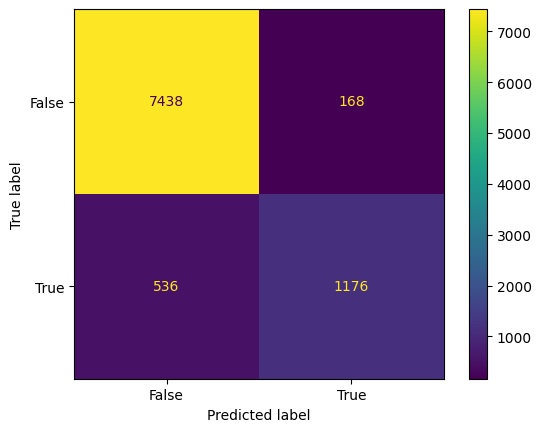

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.2748685025809556


1.9 Using MissForest Algorithm - Ran in jupyter notebooks, below are the results

-> Started at 8.57AM, finished at 9.03AM \\
-> Area Under the Curve 0.8468814187889971 \\
-> RMSE : 0.272318828833877 \\
-> Accurcay : 93% \\

Dropping all the columns which have missing data.

In [63]:
#Checking the missing data
df.isna().sum()

_STATE               0
FMONTH               0
IDATE                0
IMONTH               0
IDAY                 0
IYEAR                0
SAFETIME         10604
CADULT1          10604
CELLSEX          10604
PVTRESD3         10604
LANDLINE         10604
HHADULT          10604
SEXVAR               0
GENHLTH              0
PHYSHLTH             0
MENTHLTH             0
POORHLTH         13892
PRIMINSR             0
PERSDOC3             0
MEDCOST1             0
CHECKUP1             0
EXERANY2             0
CVDINFR4             0
CVDCRHD4             0
CVDSTRK3             0
ASTHMA3              0
CHCSCNCR             0
CHCOCNCR             0
CHCCOPD3             0
ADDEPEV3             0
CHCKDNY2             0
DIABETE4             0
HAVARTH5             0
MARITAL              0
EDUCA                0
RENTHOM1             0
CPDEMO1B             0
VETERAN3             0
EMPLOY1              0
CHILDREN             0
INCOME3              0
WEIGHT2              0
HEIGHT3              0
DEAF       

In [64]:
df.drop(['SAFETIME','CADULT1','CELLSEX','PVTRESD3','LANDLINE','HHADULT','POORHLTH','SMOKDAY2','AVEDRNK3','DRNK3GE5','MAXDRNKS',
          'FLSHTMY3','PDIABTST','PREDIAB1','CAREGIV1','CRGVEXPT','_DUALCOR','_MICHD','_DRDXAR3','HTIN4','HTM4','WTKG3','_BMI5',
          '_BMI5CAT','_FLSHOT7','_PNEUMO3'], axis = 1, inplace = True)

In [65]:
df = df.astype(int)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ECIGNOW1,ALCDAY5,FLUSHOT7,PNEUVAC4,HIVTST7,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_LTASTH1,_CASTHM1,_ASTHMS1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_AIDTST4,MARIJ_ABUSER,ECIG_ABUSER,TOBA_ABUSER,ALCO_ABUSER,LEVEL_ABUSER,TARGET_ABUSER
0,32,1,2082021,2,8,2021,2,5,30,30,3,2,1,1,2,1,2,1,1,2,1,1,1,1,3,1,2,6,1,1,2,8,88,3,140,509,2,2,1,1,1,1,1,3,4,888,2,2,1,1,2,2,2,1,2,2,1,1,1,1,4,4,88,1,1,1,1,2,3,3,1,1,2,2,2,1,1,1,2,1,1,1,1,2,9,1,61,5,1,1,4,2,3,1,1,2,0,1,0,1,1,0,0,0,0,0,0
1,32,1,2032021,2,3,2021,1,2,2,88,3,1,2,1,1,2,2,2,2,2,2,2,2,2,3,1,2,6,1,2,2,7,88,6,190,510,2,2,2,2,2,2,1,3,4,201,1,2,1,2,1,2,2,2,3,3,3,1,1,1,4,5,88,1,1,6,1,1,2,1,1,9,1,1,1,3,5,5,2,5,2,3,5,1,11,2,71,6,2,1,4,4,1,2,1,1,3,1,23,1,1,0,0,0,0,0,0
2,32,1,2062021,2,6,2021,2,2,88,2,3,1,2,1,1,2,2,2,2,2,1,2,1,2,3,1,1,6,1,1,2,7,88,8,134,410,2,2,2,2,2,2,2,3,3,201,1,1,2,2,2,2,2,2,1,1,1,1,1,1,5,5,88,1,1,1,1,1,1,2,1,9,1,1,1,3,1,1,2,1,1,1,1,2,11,2,74,6,2,1,4,5,4,1,1,1,3,1,23,1,2,0,0,0,0,0,0
3,32,1,3112021,3,11,2021,1,3,5,10,3,1,2,1,1,2,2,2,2,2,2,2,2,2,4,1,1,4,1,1,2,7,88,6,280,600,2,2,2,1,2,2,1,3,4,888,1,1,1,2,2,2,2,2,1,1,1,1,1,1,5,5,88,1,1,1,1,1,2,2,1,9,1,1,1,3,1,1,2,1,1,1,1,1,10,2,65,6,2,1,2,4,3,1,1,2,0,1,0,1,1,0,0,0,0,0,0
4,32,1,2142021,2,14,2021,2,5,30,20,3,2,2,1,2,2,2,2,1,2,1,1,1,2,1,1,1,5,1,1,2,8,88,5,240,507,2,2,2,1,2,2,1,3,3,888,1,2,2,1,1,2,2,1,1,1,1,1,1,1,3,5,88,1,1,1,1,2,3,3,1,1,2,2,2,1,1,1,2,1,1,1,1,2,9,1,60,5,2,1,3,3,1,2,1,2,0,1,0,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31055,51,10,10202022,10,20,2022,1,2,2,1,7,3,2,1,1,2,2,2,2,2,2,2,2,2,4,2,5,5,1,1,1,1,88,77,220,507,2,2,2,2,2,2,7,3,4,207,1,2,1,2,2,2,1,1,1,1,2,1,1,1,4,5,88,1,1,1,9,1,2,2,1,1,1,1,1,3,1,1,2,1,1,1,1,1,5,1,40,3,2,1,3,9,9,9,1,1,23,2,327,1,1,0,0,0,0,0,0
31056,51,10,10202022,10,20,2022,2,1,88,88,5,2,2,1,2,2,2,2,2,2,2,2,2,2,3,2,1,5,2,1,2,1,4,7,137,500,2,2,2,2,2,2,2,3,1,201,2,2,7,2,2,2,2,1,1,3,3,1,1,1,4,5,88,1,1,2,9,1,1,1,1,1,2,1,1,3,2,2,2,2,2,2,2,2,2,1,27,2,2,5,3,5,4,1,1,1,3,1,23,1,9,0,0,0,0,0,0
31057,51,11,12292022,12,29,2022,1,4,14,24,5,2,2,1,2,2,2,1,1,2,2,2,1,2,3,2,5,5,3,1,2,6,88,77,195,509,2,2,2,2,2,2,1,3,4,888,2,1,1,1,2,2,2,1,1,7,1,2,2,3,5,5,88,2,2,1,9,2,3,3,1,1,2,2,2,1,1,1,2,1,1,1,1,1,3,1,33,2,2,1,3,9,1,2,1,2,0,1,0,1,1,0,0,0,0,0,0
31058,51,11,12292022,12,29,2022,1,1,8,88,2,3,2,4,1,2,2,2,2,2,2,2,2,2,3,2,1,6,1,1,2,7,88,7,180,510,2,2,2,2,2,2,2,3,1,212,1,2,1,2,1,2,2,2,2,1,1,1,1,1,5,5,88,1,1,1,9,1,2,1,1,1,1,1,1,3,1,1,2,1,1,1,1,1,9,1,64,5,2,1,4,5,4,1,1,1,40,1,280,1,1,0,0,0,0,0,0


In [66]:
#Checking the missing data
df.isna().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
SEXVAR           0
GENHLTH          0
PHYSHLTH         0
MENTHLTH         0
PRIMINSR         0
PERSDOC3         0
MEDCOST1         0
CHECKUP1         0
EXERANY2         0
CVDINFR4         0
CVDCRHD4         0
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         0
CHCOCNCR         0
CHCCOPD3         0
ADDEPEV3         0
CHCKDNY2         0
DIABETE4         0
HAVARTH5         0
MARITAL          0
EDUCA            0
RENTHOM1         0
CPDEMO1B         0
VETERAN3         0
EMPLOY1          0
CHILDREN         0
INCOME3          0
WEIGHT2          0
HEIGHT3          0
DEAF             0
BLIND            0
DECIDE           0
DIFFWALK         0
DIFFDRES         0
DIFFALON         0
SMOKE100         0
USENOW3          0
ECIGNOW1         0
ALCDAY5          0
FLUSHOT7         0
PNEUVAC4         0
HIVTST7          0
ACEDEPRS         0
ACEDRINK         0
ACEDRUGS         0
ACEPRISN    

In [67]:
df.shape

(31060, 107)

### 2. Data Duplication Issue

In [68]:
#Checking for Data duplication issue
dup = df.duplicated()
print(dup.any())

False


### 3. Data Inconsistencies like datatype compatibility and feature encoding

In [69]:
#Checking for data inconsistencies, feature encoding, datatype compatibility
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 107 columns):
 #    Column         Non-Null Count  Dtype
---   ------         --------------  -----
 0    _STATE         31060 non-null  int64
 1    FMONTH         31060 non-null  int64
 2    IDATE          31060 non-null  int64
 3    IMONTH         31060 non-null  int64
 4    IDAY           31060 non-null  int64
 5    IYEAR          31060 non-null  int64
 6    SEXVAR         31060 non-null  int64
 7    GENHLTH        31060 non-null  int64
 8    PHYSHLTH       31060 non-null  int64
 9    MENTHLTH       31060 non-null  int64
 10   PRIMINSR       31060 non-null  int64
 11   PERSDOC3       31060 non-null  int64
 12   MEDCOST1       31060 non-null  int64
 13   CHECKUP1       31060 non-null  int64
 14   EXERANY2       31060 non-null  int64
 15   CVDINFR4       31060 non-null  int64
 16   CVDCRHD4       31060 non-null  int64
 17   CVDSTRK3       31060 non-null  int64
 18   ASTHMA3        31060 non

In [70]:
df.select_dtypes(exclude = 'int64')

""
0
1
2
3
4
...
31055
31056
31057
31058


In [71]:
#Checking for negative data in the dataframe
if (df < 0).any(axis=None):
    print("There are negative values in the DataFrame.")
else:
    print("No negative values in the DataFrame.")

No negative values in the DataFrame.


### 4. Outlier Detection

In [72]:
df.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ECIGNOW1,ALCDAY5,FLUSHOT7,PNEUVAC4,HIVTST7,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_LTASTH1,_CASTHM1,_ASTHMS1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_AIDTST4,MARIJ_ABUSER,ECIG_ABUSER,TOBA_ABUSER,ALCO_ABUSER,LEVEL_ABUSER,TARGET_ABUSER
count,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000
mean,39.891,6.498,6925881.589,6.768,15.606,2021.640,1.539,2.553,60.479,59.555,8.166,1.574,1.948,1.446,1.237,1.968,1.989,1.969,1.870,1.926,1.899,1.940,1.827,1.976,2.750,1.655,2.300,5.103,1.348,1.429,1.872,3.952,69.255,22.369,697.866,702.124,1.914,1.965,1.928,1.861,1.969,1.946,1.617,2.952,2.222,496.075,1.491,1.982,1.986,1.975,1.882,2.040,2.057,1.973,1.516,1.638,1.896,1.430,1.371,1.312,4.611,4.818,79.723,1.368,1.154,1.462,5.462,1.185,1.638,1.628,1.253,4.567,1.240,1.176,1.172,2.809,4.817,4.880,2.013,1.825,1.349,1.581,1.588,1.539,8.189,1.443,57.200,4.583,2.158,1.466,3.123,5.371,3.420,1.158,1.044,1.447,18.632,1.189,904.732,1.114,2.096,0.056,0.020,0.018,0.118,0.211,0.189
std,6.988,3.211,3341631.119,3.344,8.436,0.517,0.498,1.052,37.225,37.702,21.024,0.875,0.364,1.095,0.479,0.442,0.558,0.346,0.474,0.493,0.480,0.440,0.568,0.397,0.738,0.616,1.730,0.974,0.824,1.512,0.460,2.894,35.621,32.608,2121.580,1252.720,0.443,0.343,0.554,0.498,0.263,0.393,0.626,0.285,1.206,353.965,0.727,1.559,1.311,1.130,1.075,1.016,0.951,1.263,1.434,1.428,1.521,1.420,1.389,1.366,1.116,0.884,23.243,0.482,0.361,1.220,3.828,0.510,1.253,1.200,1.302,3.946,0.510,0.585,0.798,0.853,17.910,17.906,0.714,2.112,1.251,1.548,1.633,0.498,3.570,0.528,17.379,1.558,1.833,1.094,0.957,2.215,0.984,0.656,0.205,0.497,29.229,0.725,7732.147,0.661,1.741,0.229,0.138,0.132,0.323,0.462,0.391
min,32.000,1.000,1012022.000,1.000,1.000,2021.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,53.000,400.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,101.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,18.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.00

<ipython-input-73-cc7c37ce74e6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


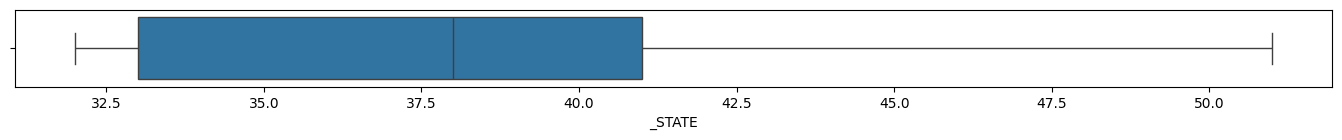

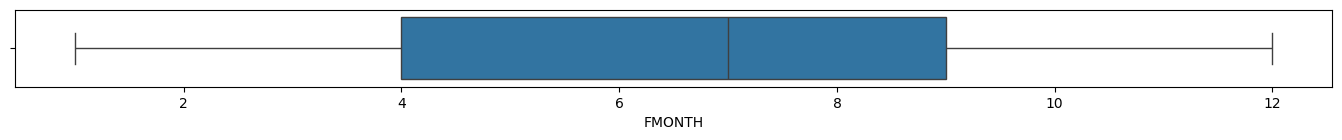

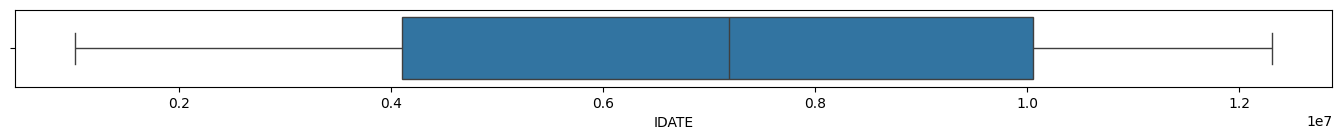

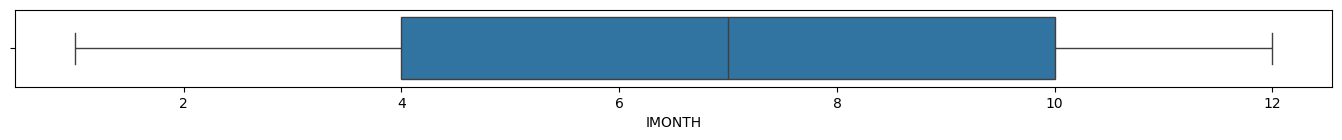

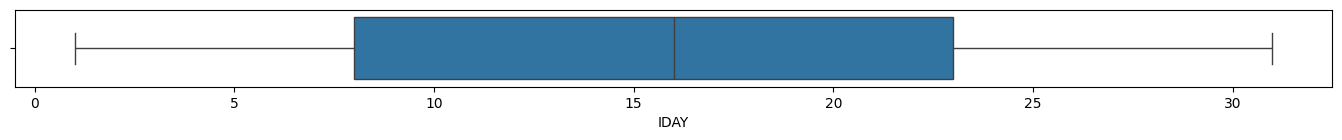

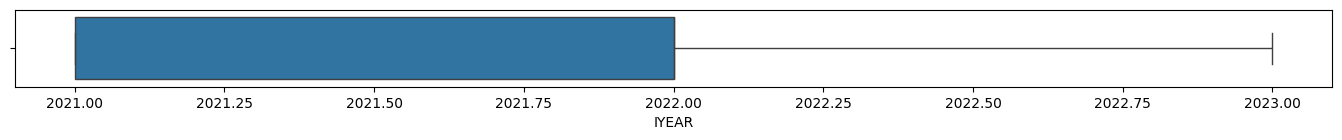

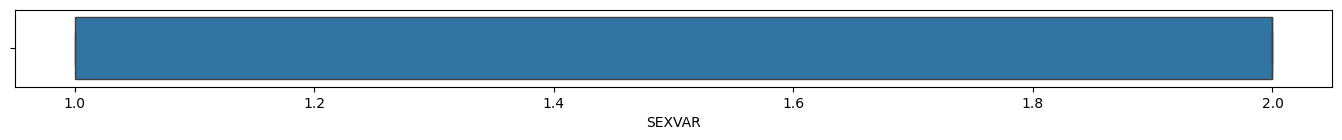

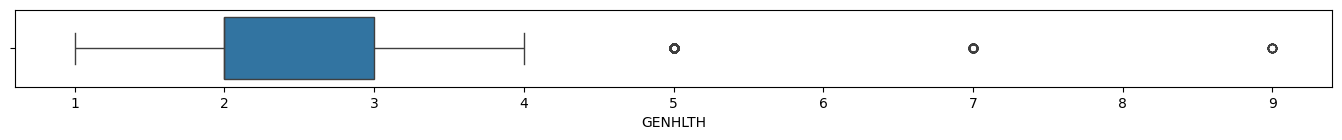

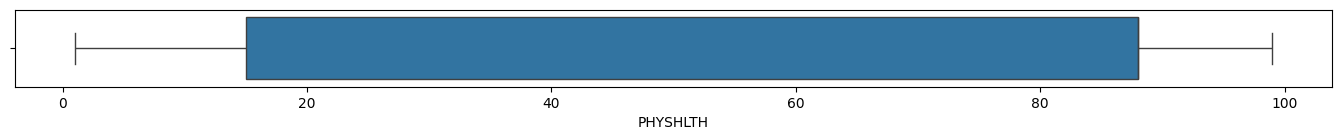

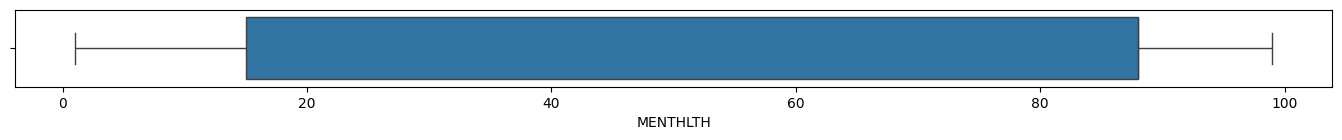

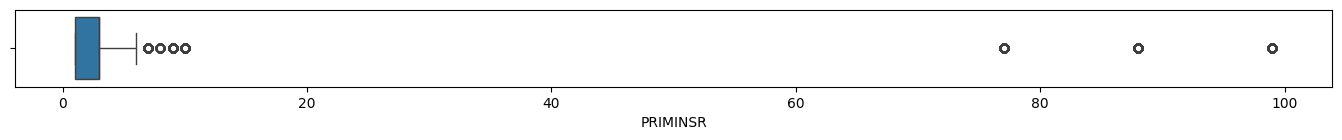

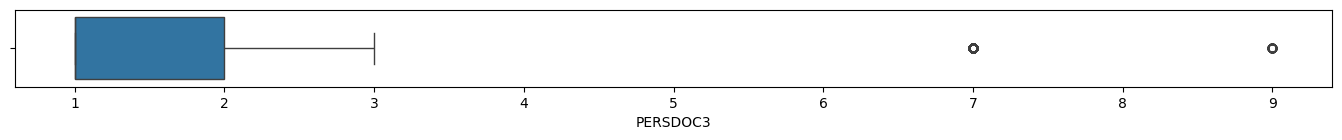

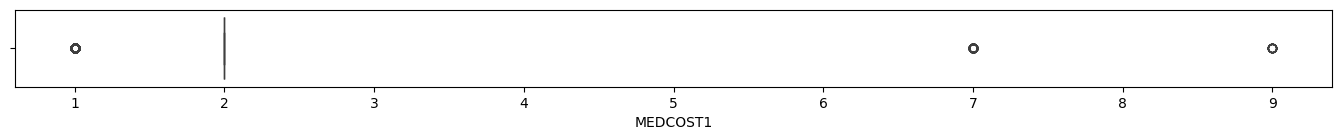

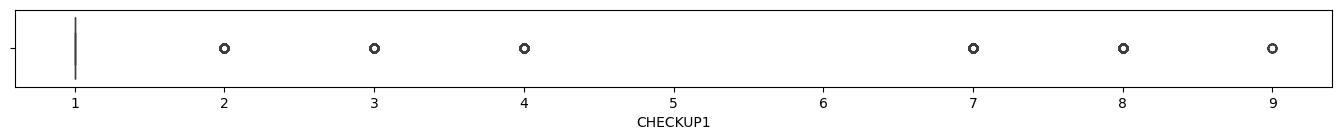

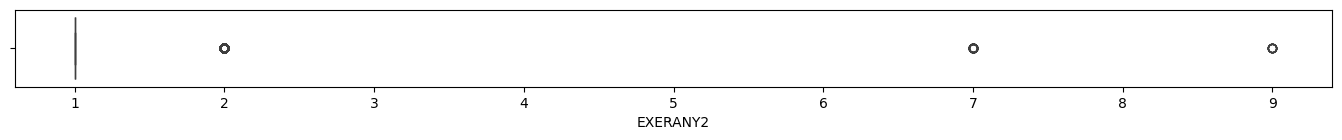

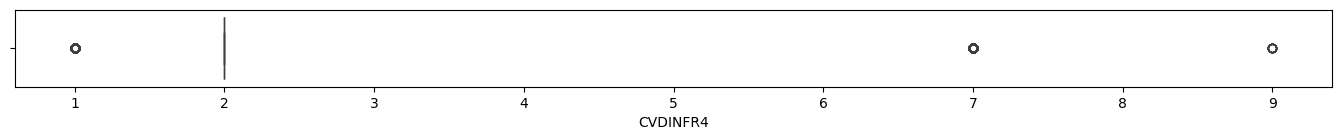

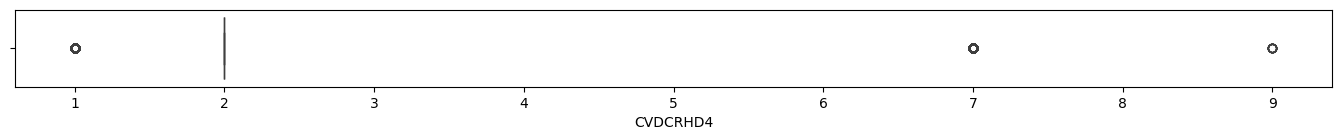

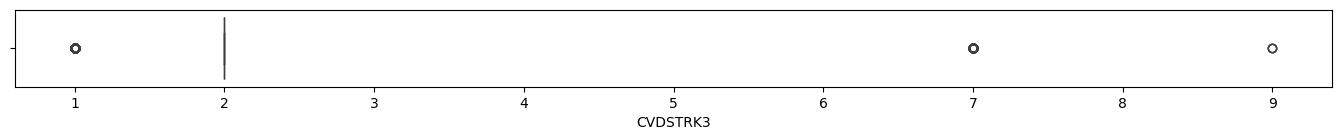

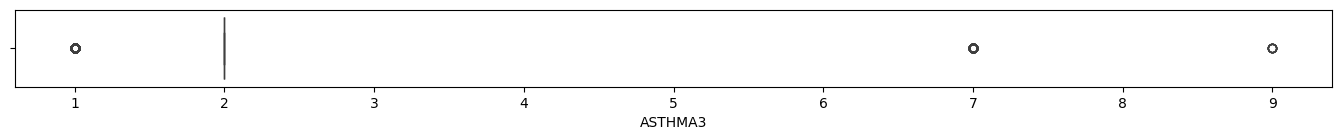

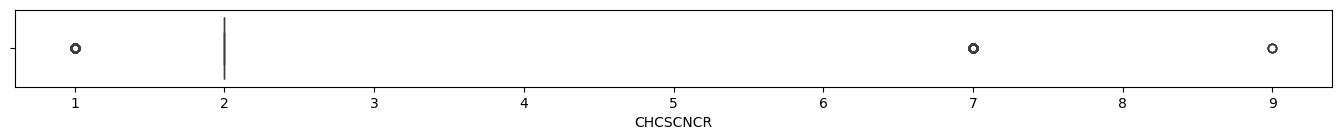

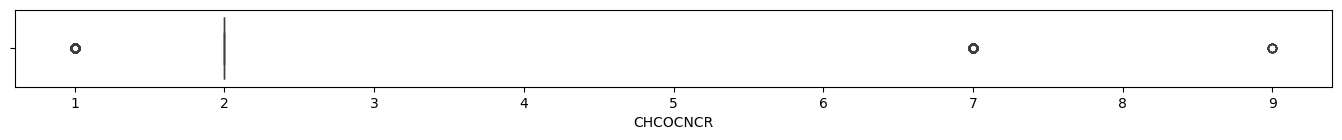

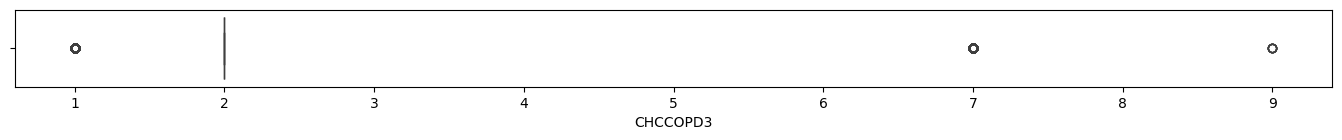

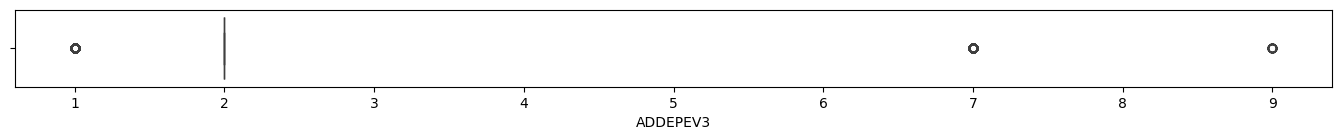

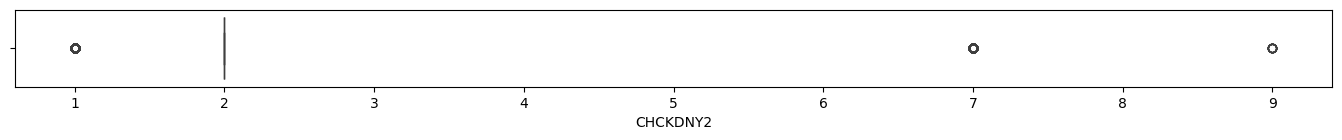

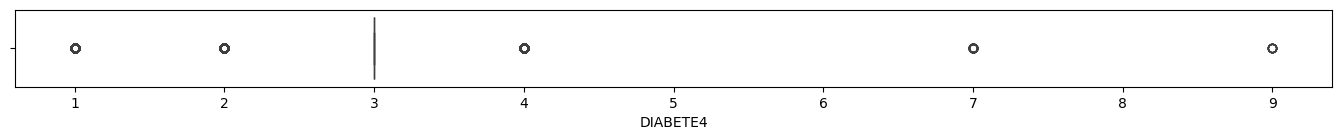

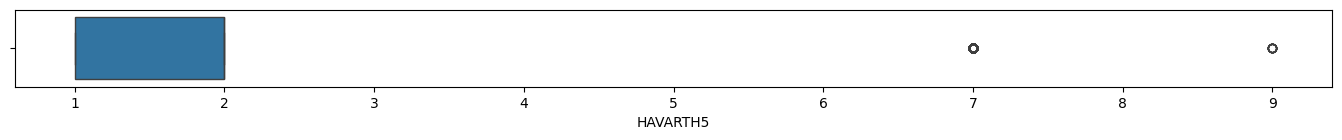

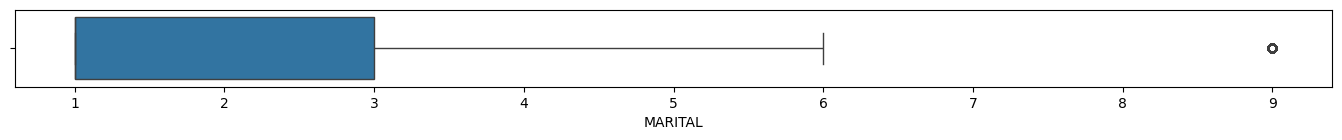

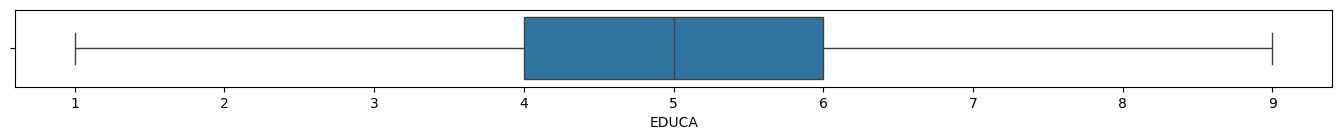

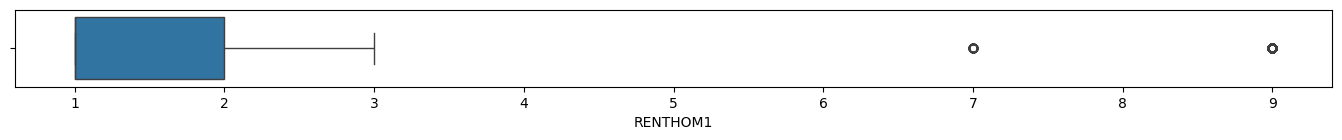

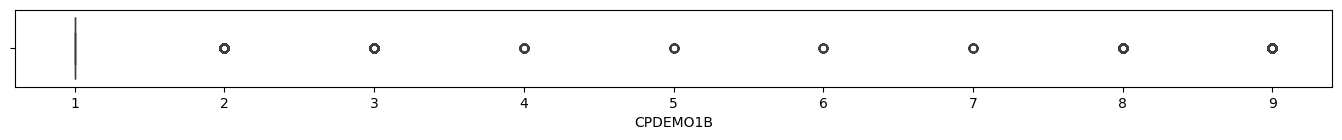

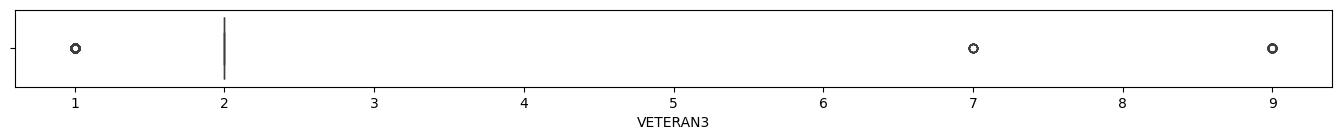

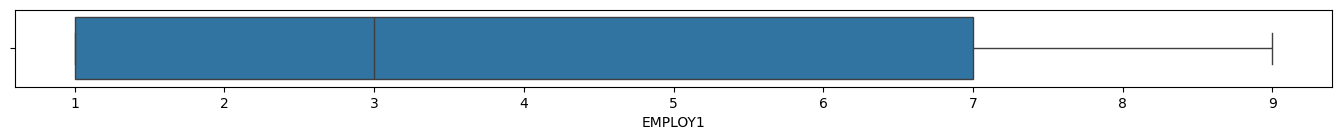

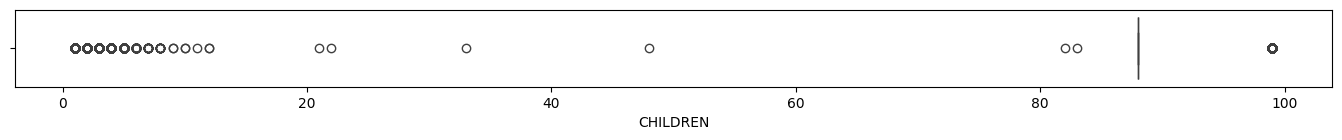

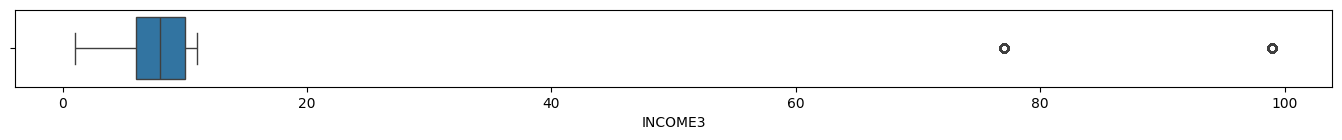

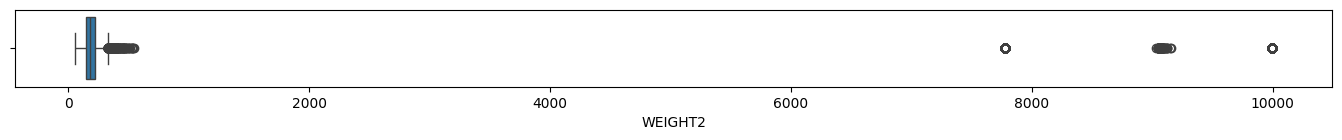

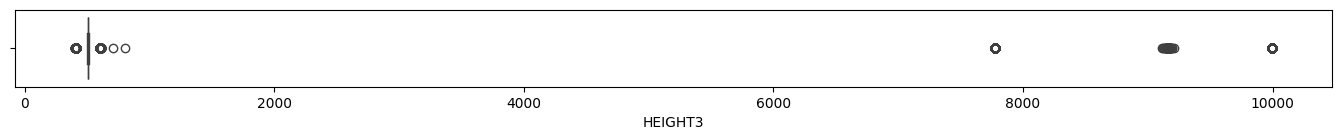

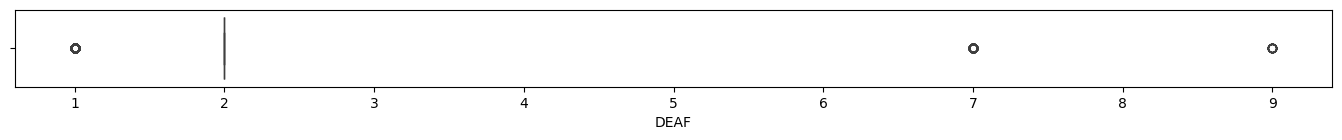

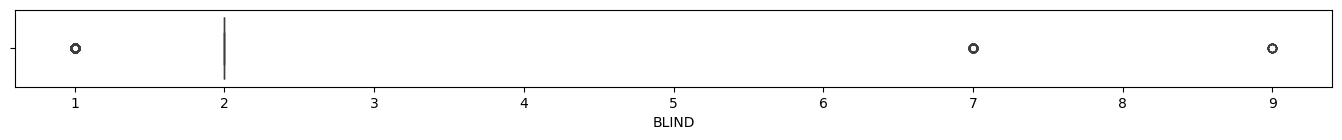

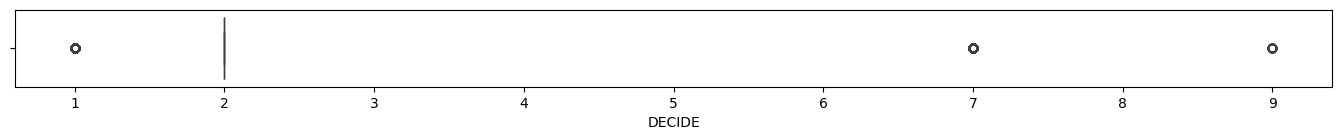

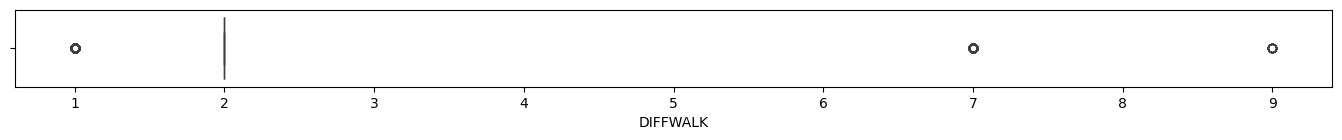

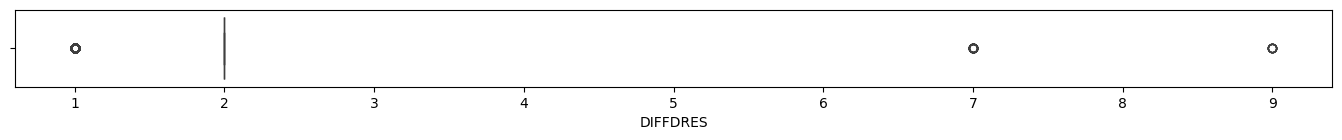

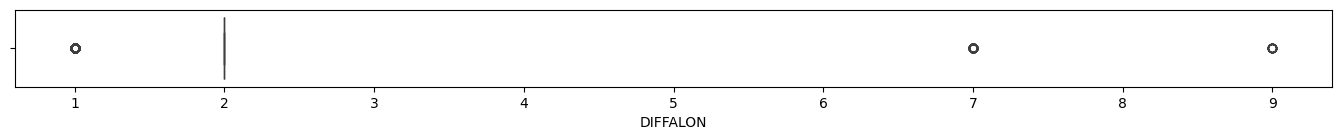

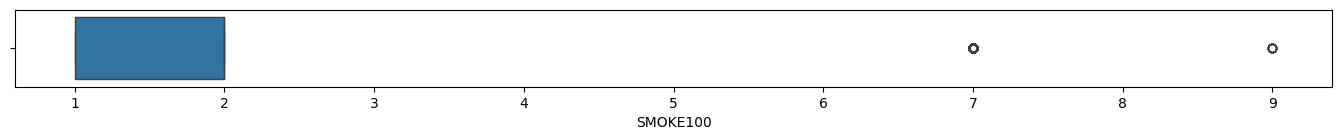

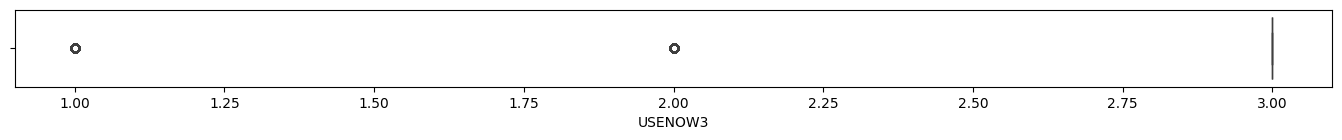

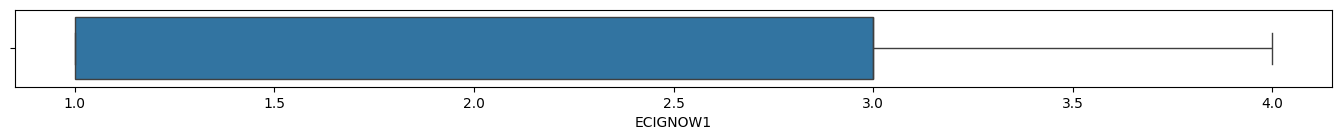

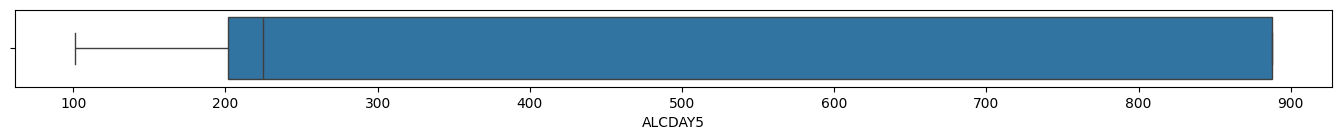

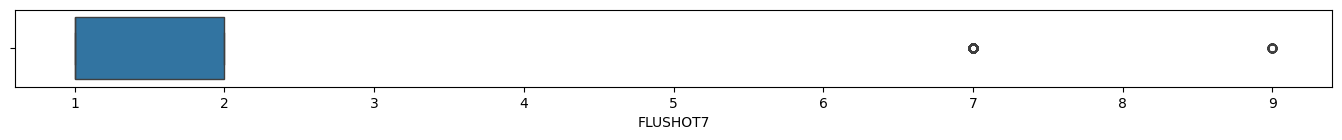

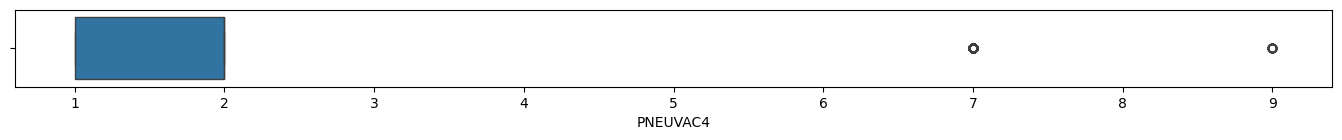

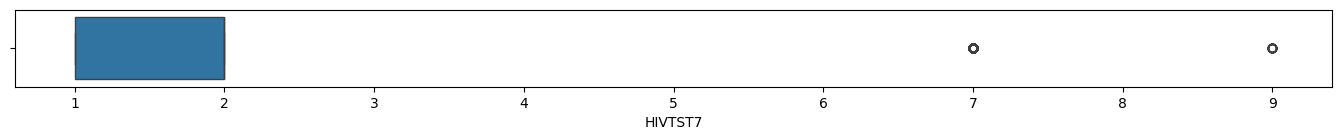

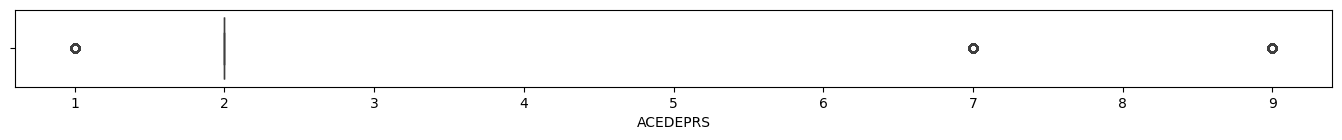

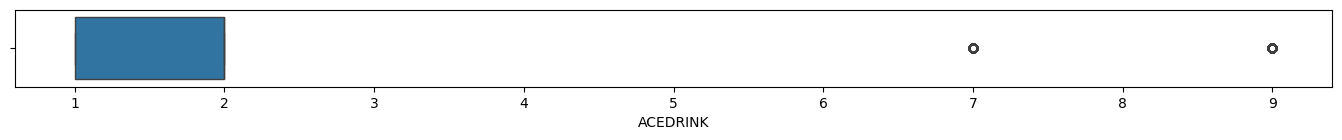

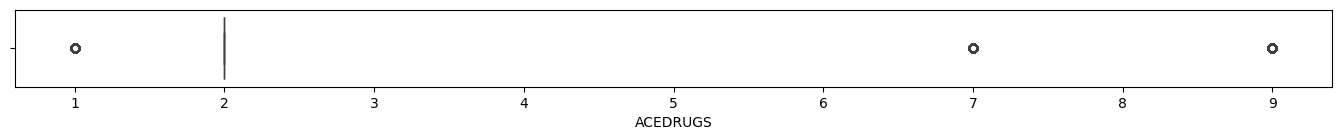

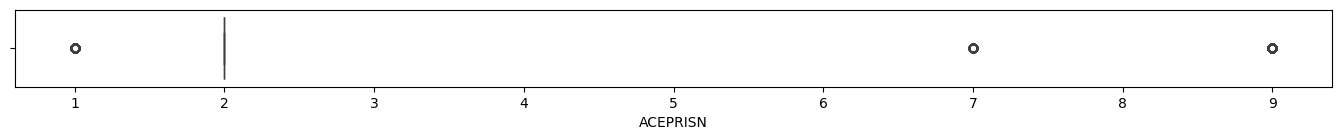

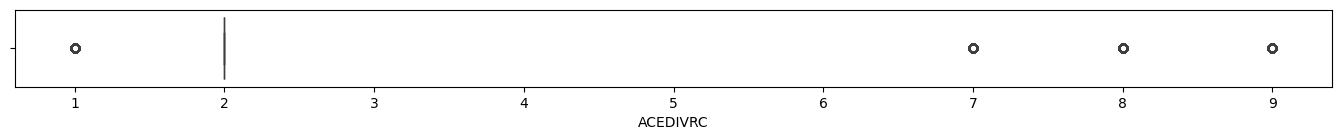

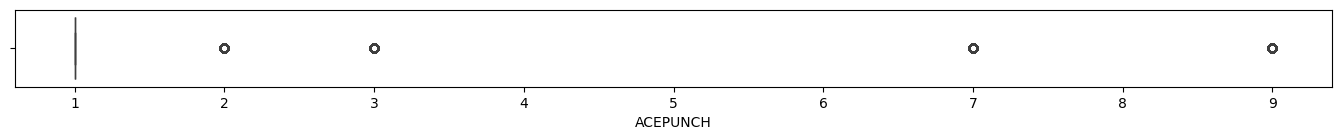

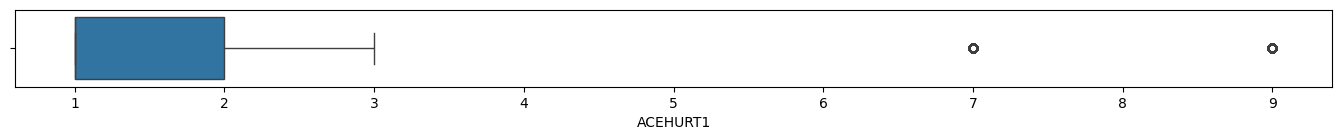

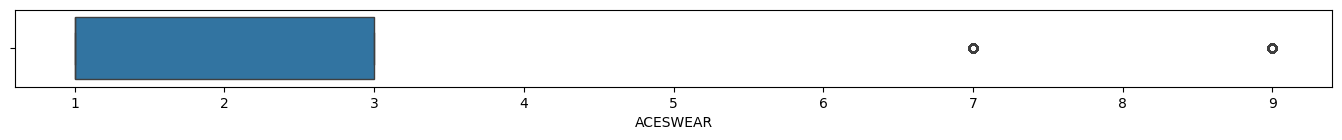

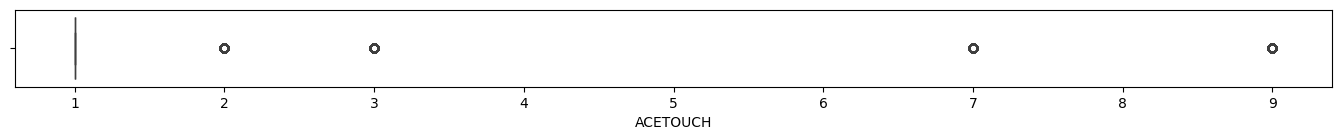

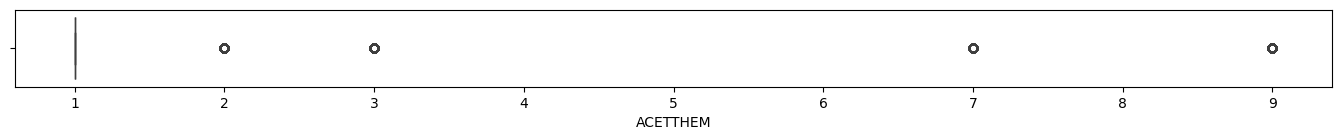

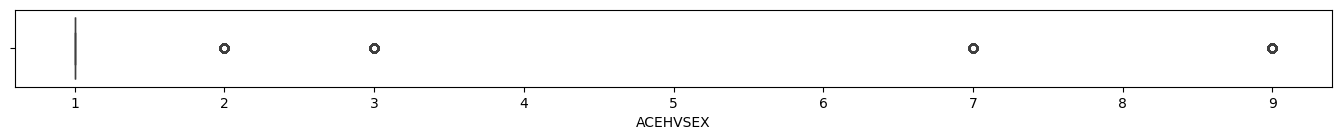

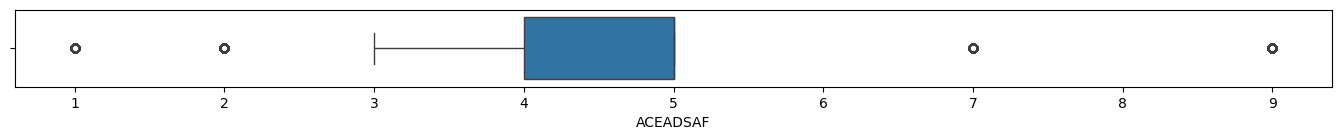

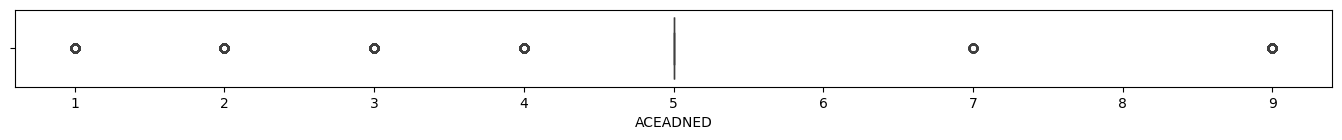

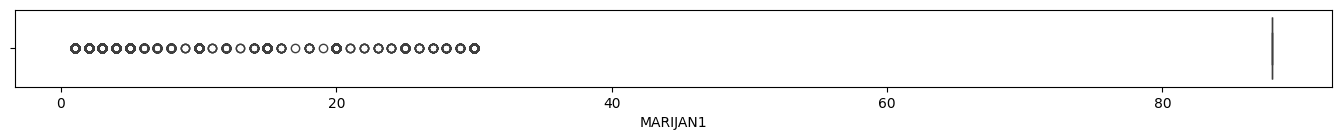

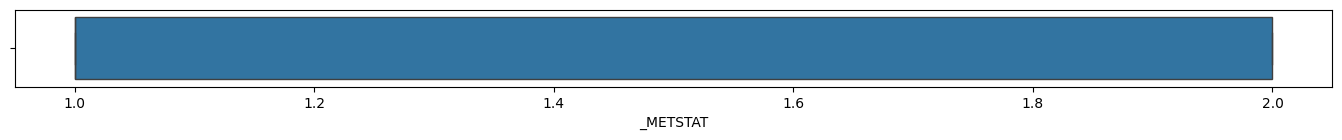

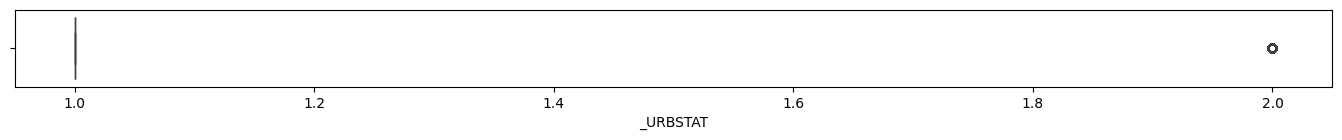

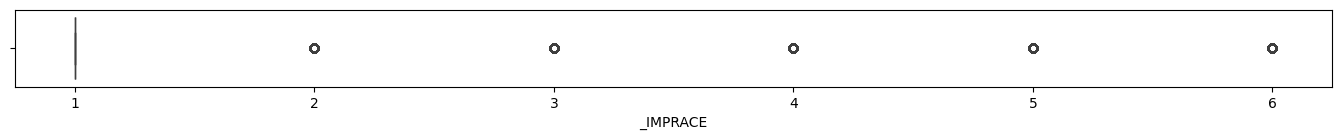

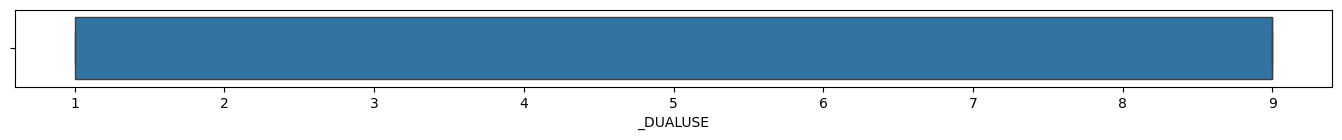

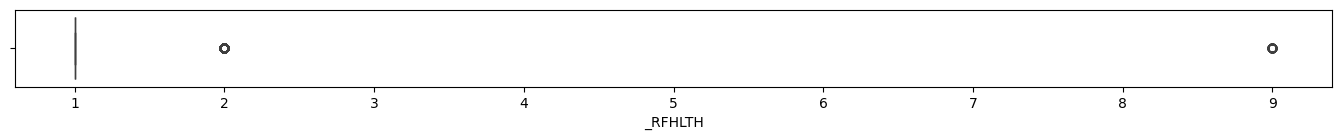

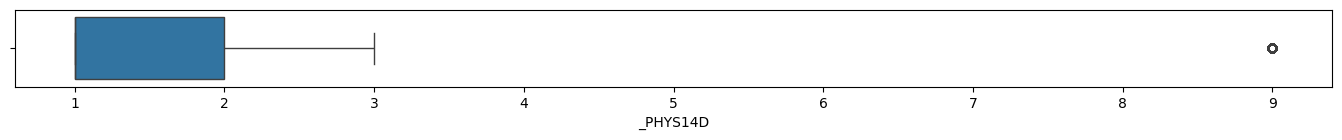

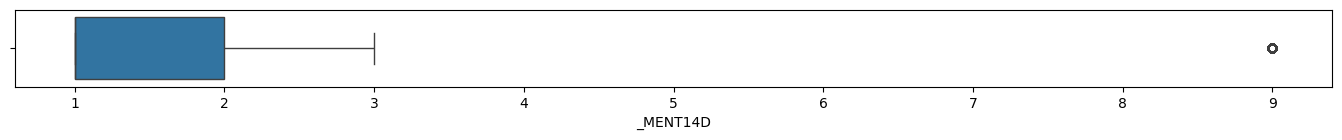

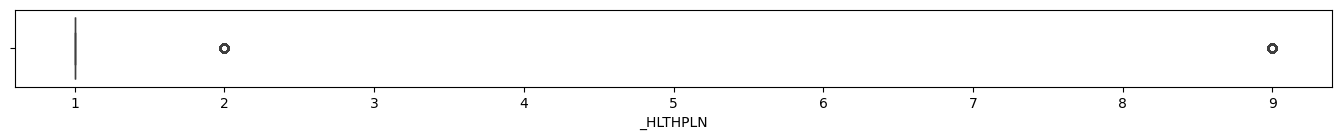

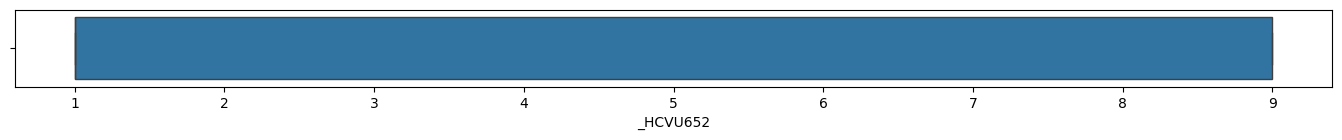

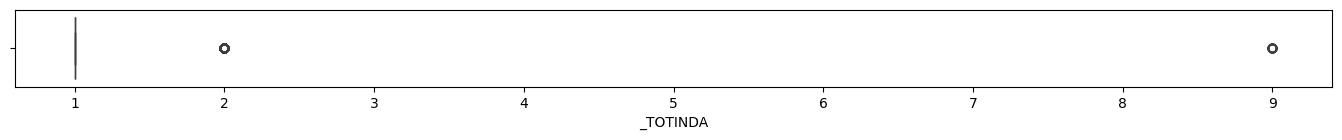

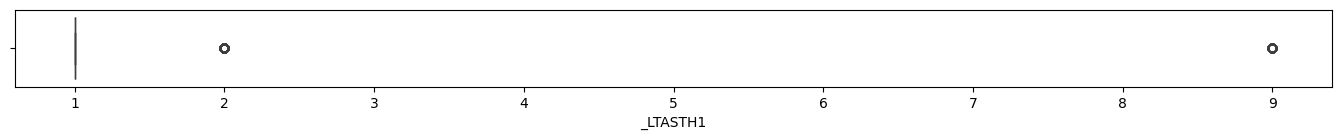

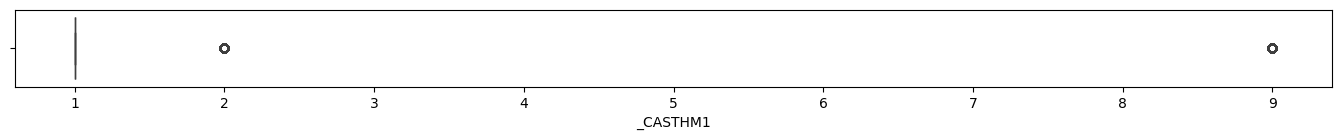

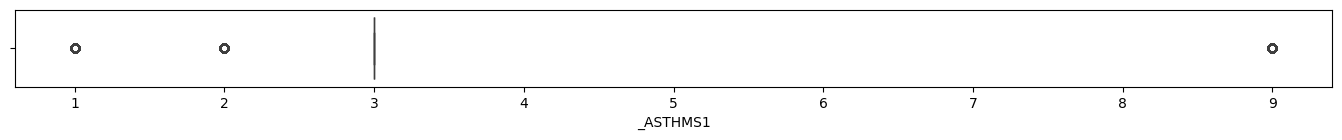

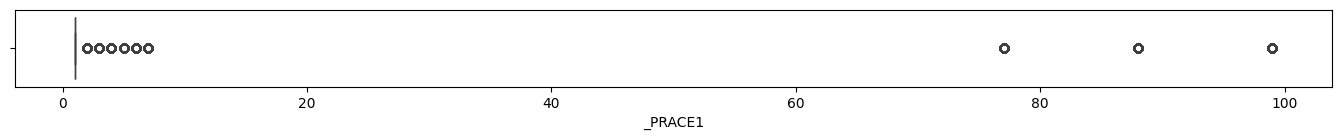

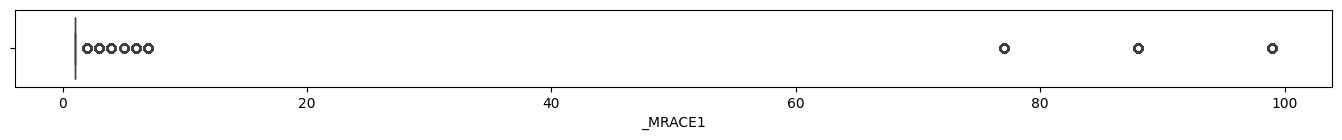

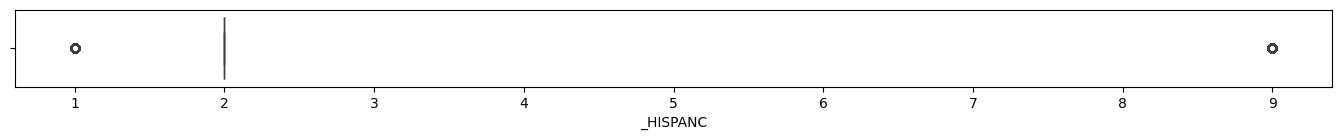

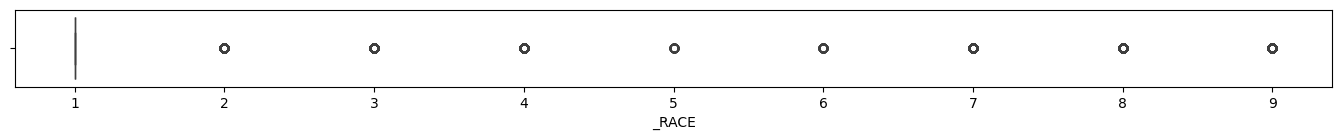

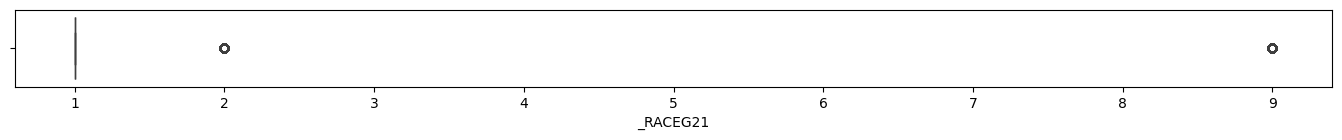

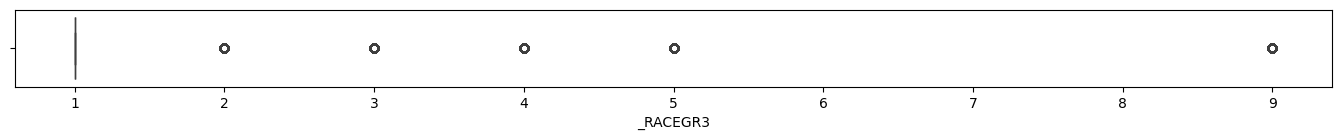

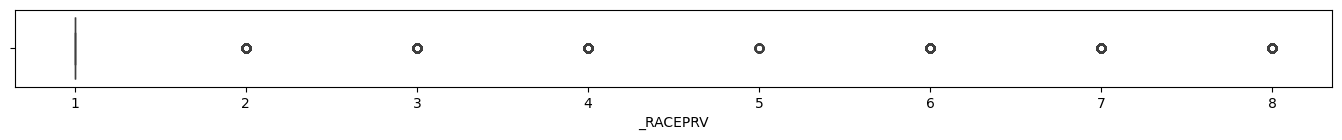

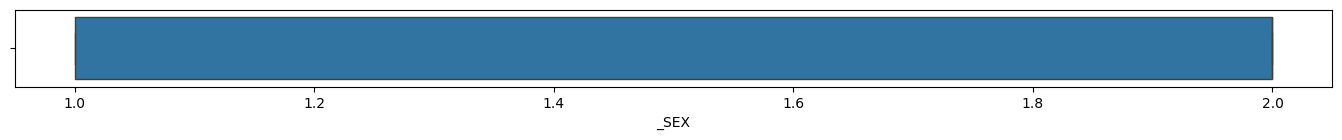

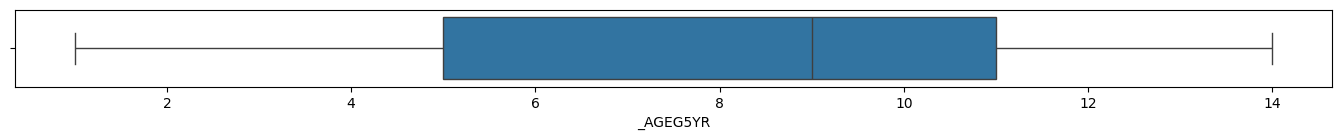

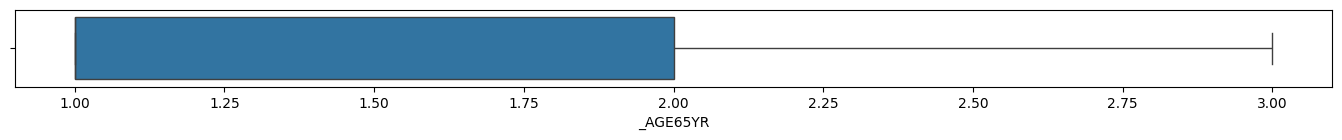

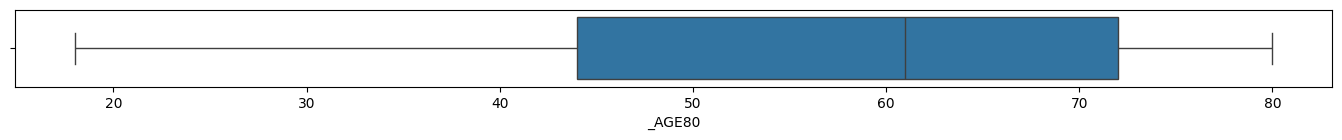

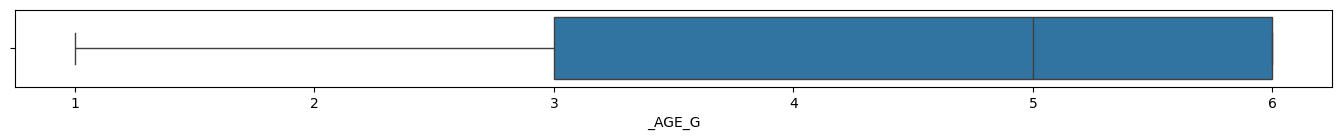

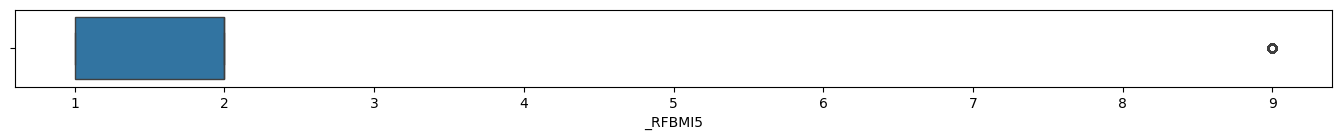

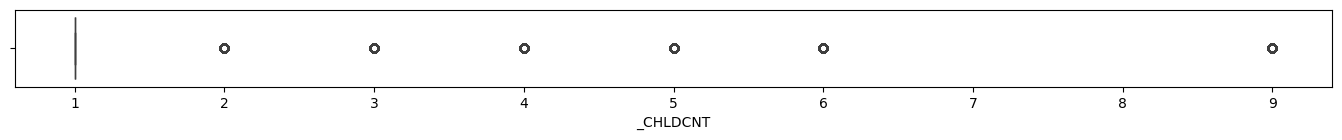

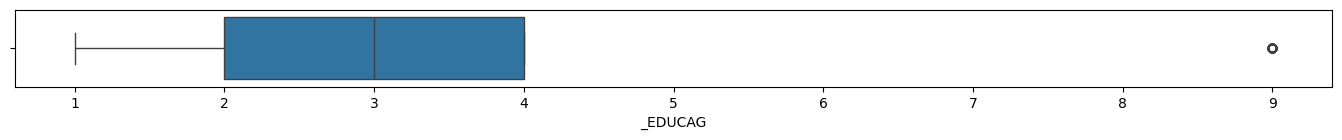

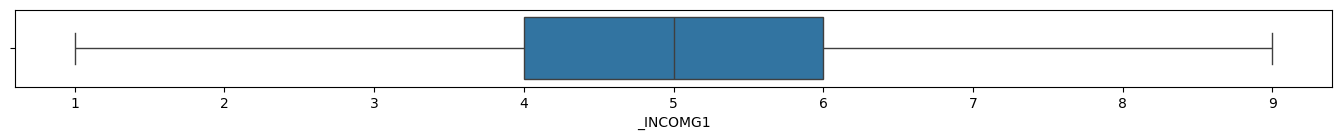

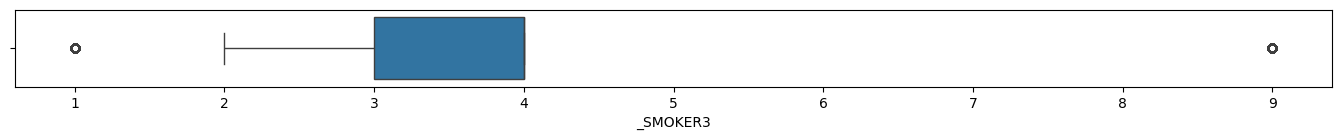

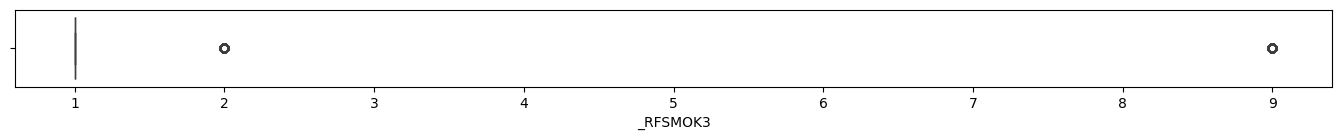

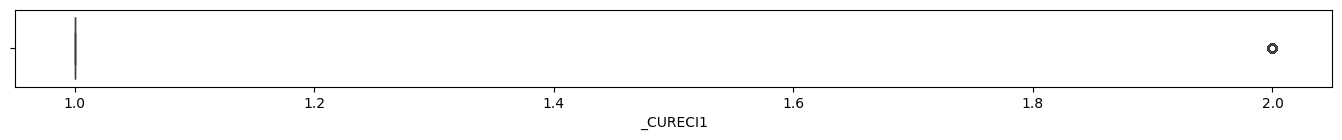

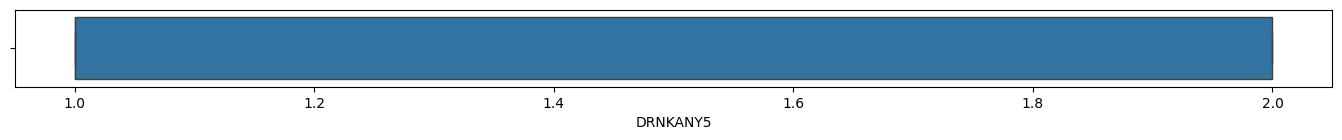

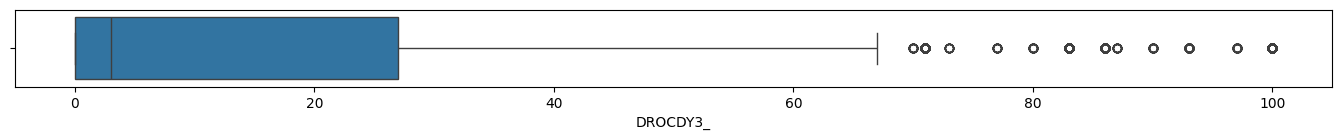

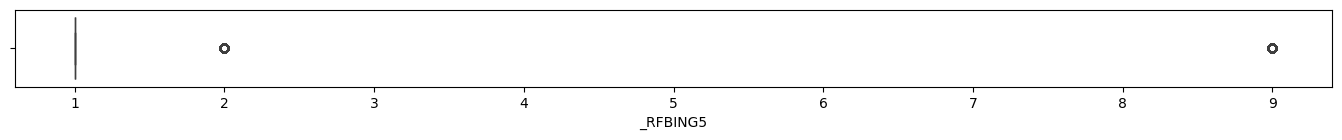

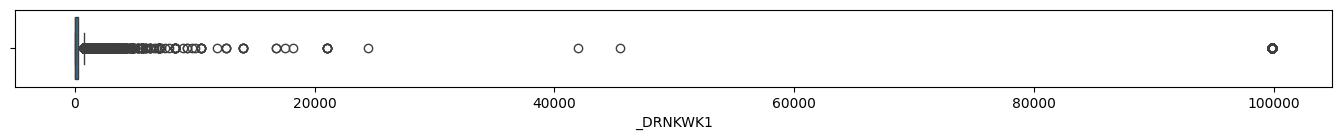

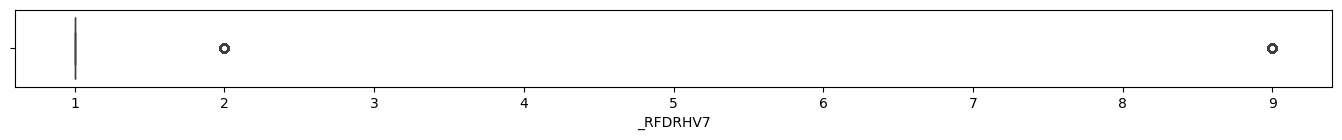

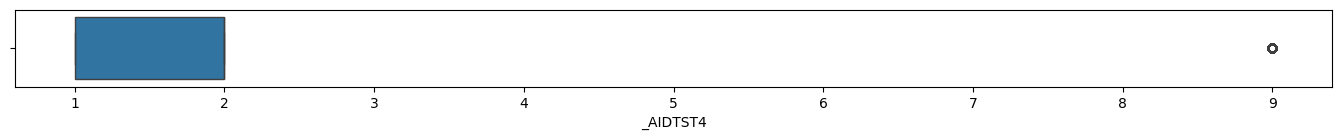

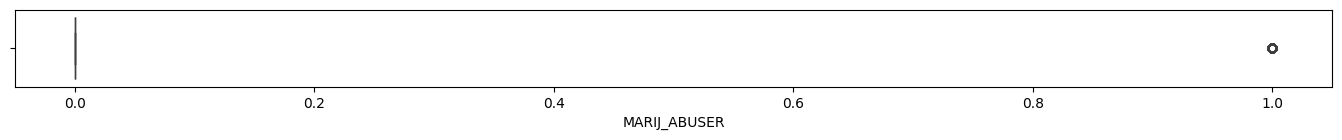

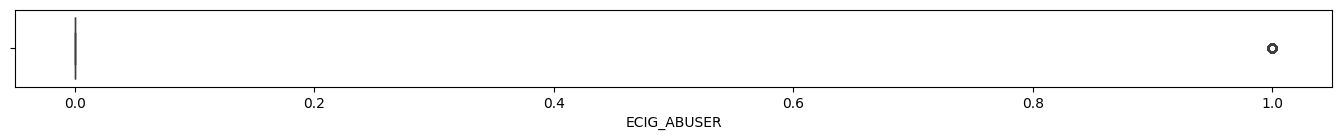

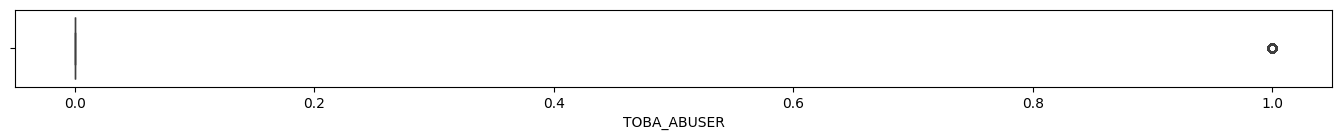

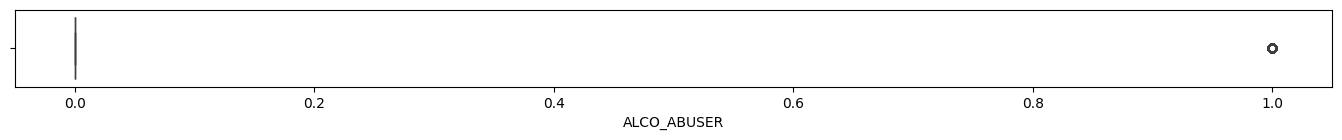

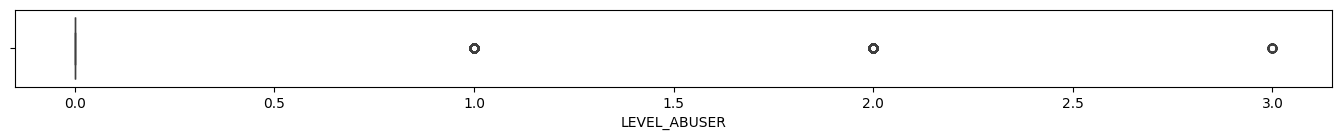

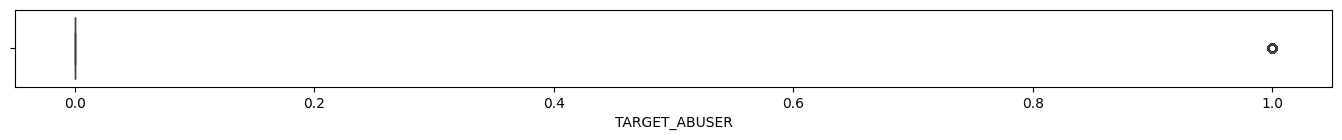

In [73]:
#Visualizing the Outliers for all the columns
import matplotlib.pyplot as plt
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

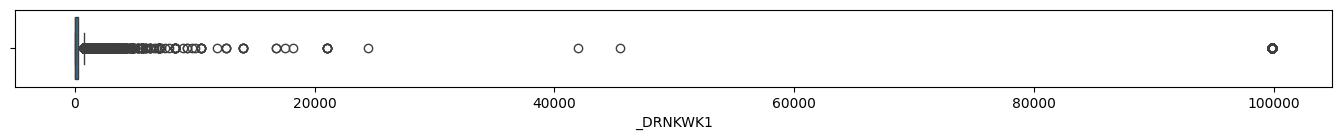

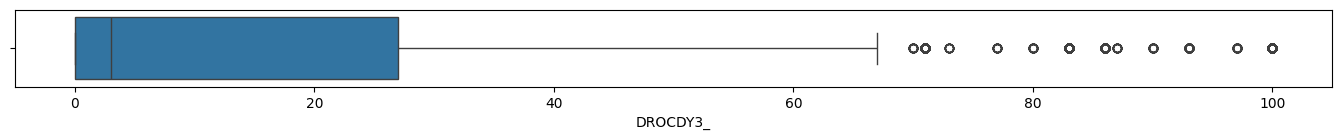

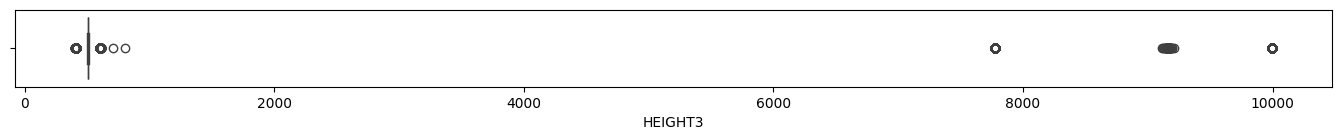

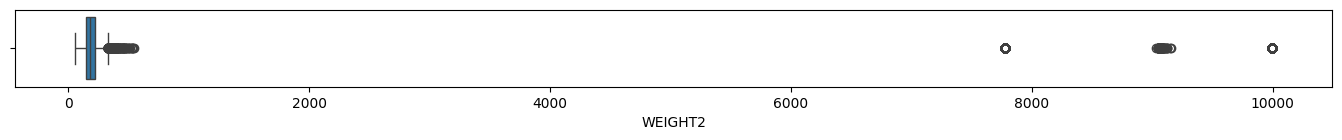

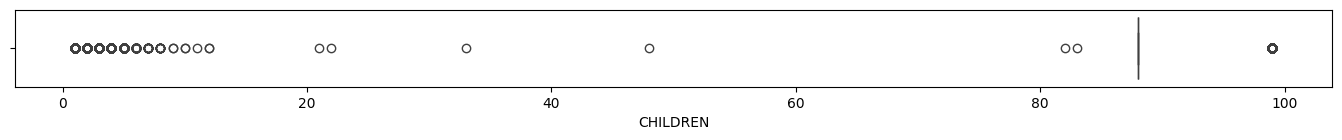

In [74]:
#Visualizing the Outliers for specific the columns that are extremely skewed from the boxplots
columns1 = ['_DRNKWK1', 'DROCDY3_','HEIGHT3','WEIGHT2','CHILDREN']

for column in columns1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df[columns1], x=column)

Checking how does the performance of the model change if we drop the outliers \\

1. With the Outliers

In [75]:
# Creating a deep copies of the DataFrame
df_wout = df.copy(deep=True)
df_out = df.copy(deep=True)

In [76]:
#Dropping the columns used in calculating the output field
df_out.drop(['MARIJ_ABUSER','ECIG_ABUSER','TOBA_ABUSER','ALCO_ABUSER','LEVEL_ABUSER','MARIJAN1','USENOW3','ECIGNOW1','ALCDAY5'], axis = 1, inplace = True)
#Dropping the columns used in calculating the output field
df_wout.drop(['MARIJ_ABUSER','ECIG_ABUSER','TOBA_ABUSER','ALCO_ABUSER','LEVEL_ABUSER','MARIJAN1','USENOW3','ECIGNOW1','ALCDAY5'], axis = 1, inplace = True)

In [77]:
X = df_out.drop(['TARGET_ABUSER'], axis=1)
y = df_out['TARGET_ABUSER']

#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.9173949038726888
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7562
           1       0.87      0.65      0.75      1756

    accuracy                           0.92      9318
   macro avg       0.90      0.82      0.85      9318
weighted avg       0.91      0.92      0.91      9318

Area Under the Curve 0.8158372187035163
Confusion Matrix : 
[[7395  167]
 [ 608 1148]]


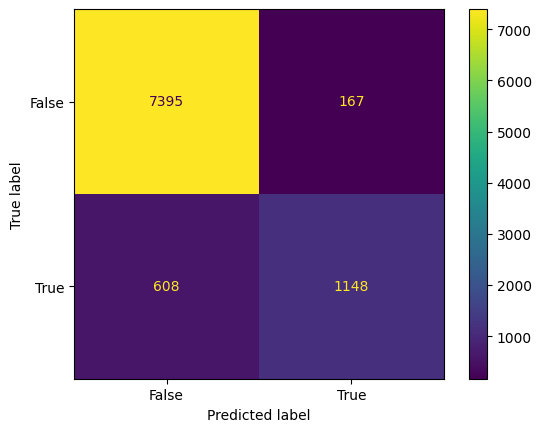

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.28839617643534815


2. After removing the outliers as well

In [80]:
#Features that had outliers are being dropped.
df_wout.drop(['_DRNKWK1', 'DROCDY3_','HEIGHT3','WEIGHT2','CHILDREN'], axis=1, inplace=True)

In [81]:
X = df_wout.drop(['TARGET_ABUSER'], axis=1)
y = df_wout['TARGET_ABUSER']

#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.8267868641339343
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      7624
           1       0.63      0.21      0.31      1694

    accuracy                           0.83      9318
   macro avg       0.74      0.59      0.61      9318
weighted avg       0.81      0.83      0.80      9318

Area Under the Curve 0.5899598112466566
Confusion Matrix : 
[[7416  208]
 [1343  351]]


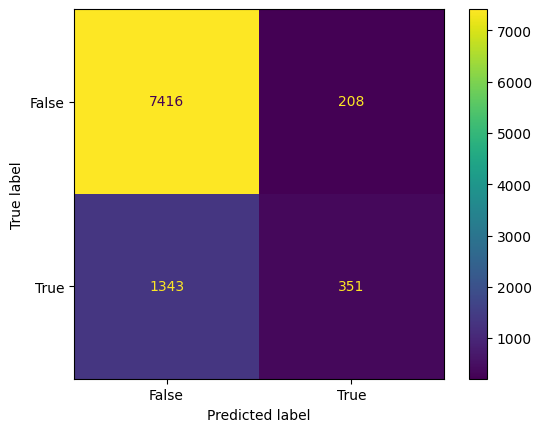

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg')
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.40798532857476644


In [84]:
df.shape

(31060, 107)

Since there is a significant drop in the performance after removing the outliers, we will keep the outliers at this point.

In [85]:
# write the cleaned data frame to a new Excel file
df.to_excel("/content/drive/MyDrive/Capstone_Project/Backup/preprocessed_sa_2021_2022.xlsx", index=False, header = True)